# RENTS FILE

In [1]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_cleaned.xlsx"

rents_data = pd.read_excel(file_path)

print("Valori lipsă înainte de tratament:")
print(rents_data.isnull().sum())

rents_data.drop(columns=['Number of Rooms'], inplace=True)

rents_data['Area'] = rents_data['Area'].fillna("Unknown")

categorical_columns = ['Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
for col in categorical_columns:
    rents_data[col] = rents_data[col].fillna("Unknown")


rents_data['Property Size (sq.m)'] = rents_data['Property Size (sq.m)'].str.replace(',', '.', regex=False)
rents_data['Annual Amount'] = rents_data['Annual Amount'].str.replace(',', '.', regex=False)
rents_data['Property Size (sq.m)'] = pd.to_numeric(rents_data['Property Size (sq.m)'], errors='coerce')
rents_data['Annual Amount'] = pd.to_numeric(rents_data['Annual Amount'], errors='coerce')

rents_data['Property Size (sq.m)'] = rents_data['Property Size (sq.m)'].fillna(rents_data['Property Size (sq.m)'].median())
rents_data['Annual Amount'] = rents_data['Annual Amount'].fillna(rents_data['Annual Amount'].median())

print("\nValori lipsă după tratament:")
print(rents_data.isnull().sum())

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned_processed.xlsx"
rents_data.to_excel(output_path, index=False)

print(f"Datele au fost prelucrate și salvate la {output_path}.")


Valori lipsă înainte de tratament:
Registration Date            0
Start Date                   0
End Date                     0
Property ID                  0
Area                         2
Annual Amount                4
Property Size (sq.m)       149
Property Type                0
Property Sub Type         5635
Number of Rooms         997613
Usage                     7756
Nearest Metro           166398
Nearest Mall            174074
Nearest Landmark         83461
dtype: int64

Valori lipsă după tratament:
Registration Date          0
Start Date                 0
End Date                   0
Property ID                0
Area                       0
Annual Amount              0
Property Size (sq.m)       0
Property Type              0
Property Sub Type       5635
Usage                   7756
Nearest Metro              0
Nearest Mall               0
Nearest Landmark           0
dtype: int64
Datele au fost prelucrate și salvate la D:\Desights.ai\Dubai Real Estate Price Prediction Challeng

In [3]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned_processed.xlsx"

rents_data = pd.read_excel(file_path)

rents_data['Registration Date'] = pd.to_datetime(rents_data['Registration Date'])

rents_data['Month'] = rents_data['Registration Date'].dt.to_period('M')  # Pentru lună
rents_data['Week'] = rents_data['Registration Date'].dt.to_period('W')  # Pentru săptămână

rents_data['Average Price (Monthly)'] = rents_data.groupby(['Month', 'Property Type'])['Annual Amount'].transform('mean')

rents_data['Average Price (Weekly)'] = rents_data.groupby(['Week', 'Property Type'])['Annual Amount'].transform('mean')

output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_with_averages.xlsx"
rents_data.to_excel(output_path, index=False)

print(f"Datele actualizate au fost salvate la {output_path}.")


Datele actualizate au fost salvate la D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_with_averages.xlsx.


# EDA FOR RENTS FILE

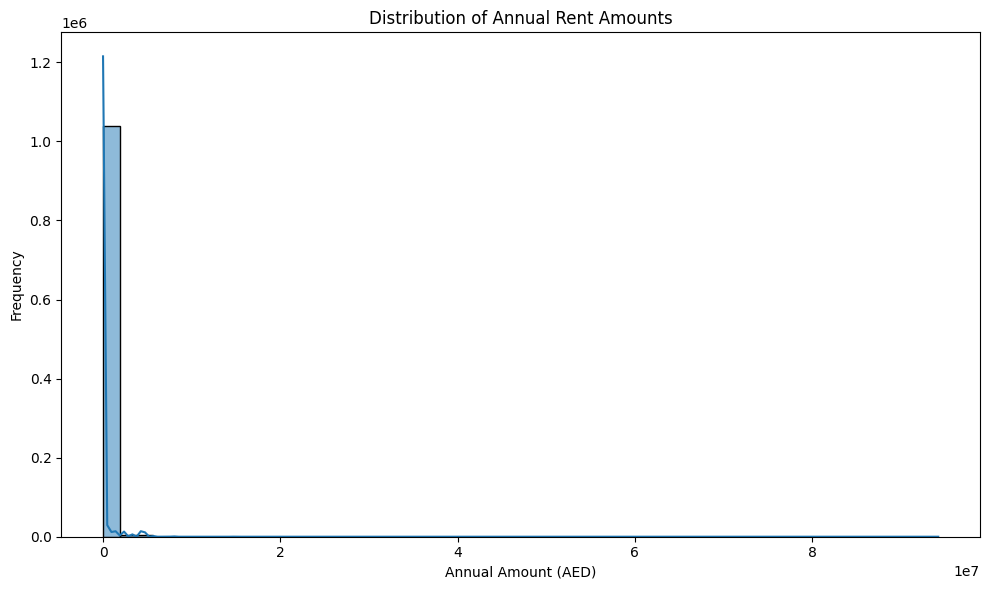

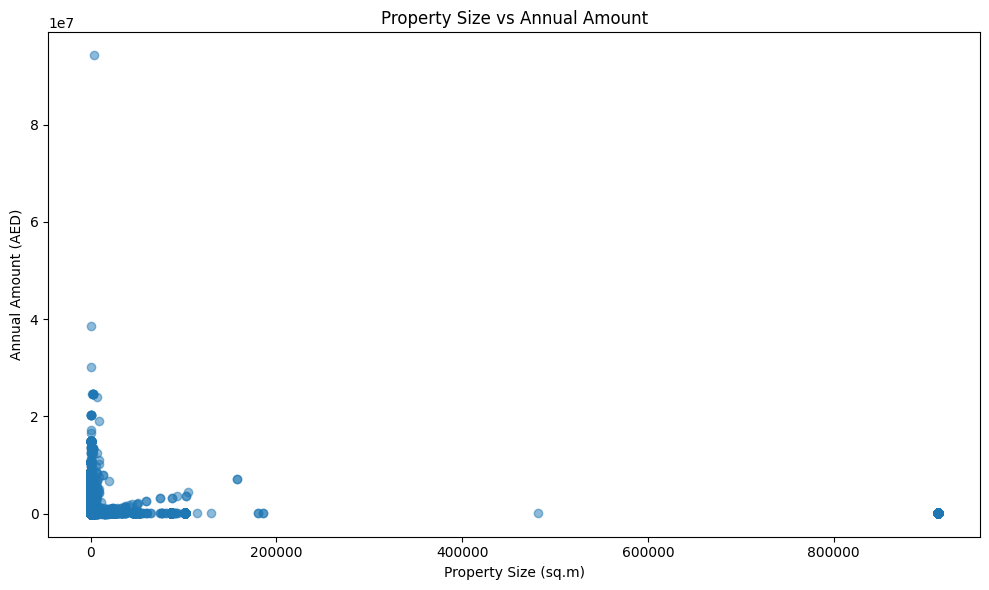

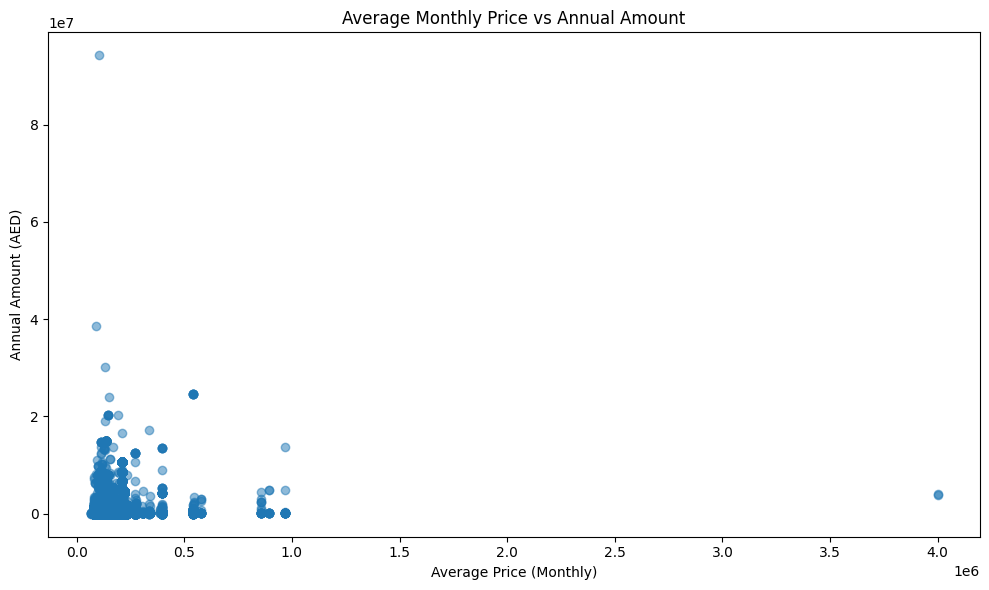

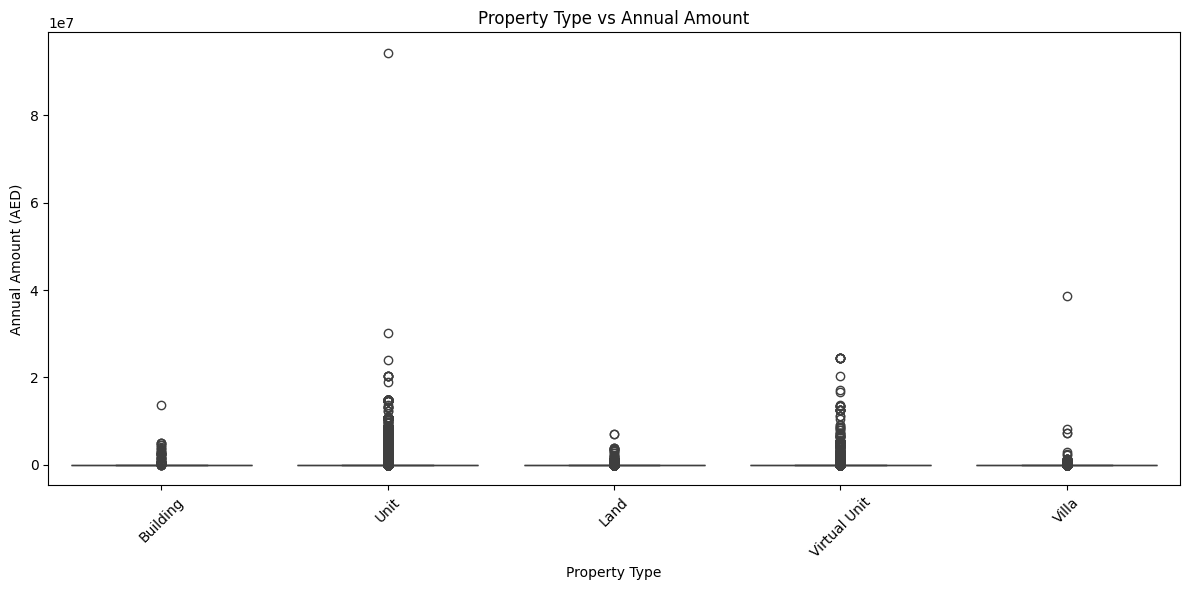

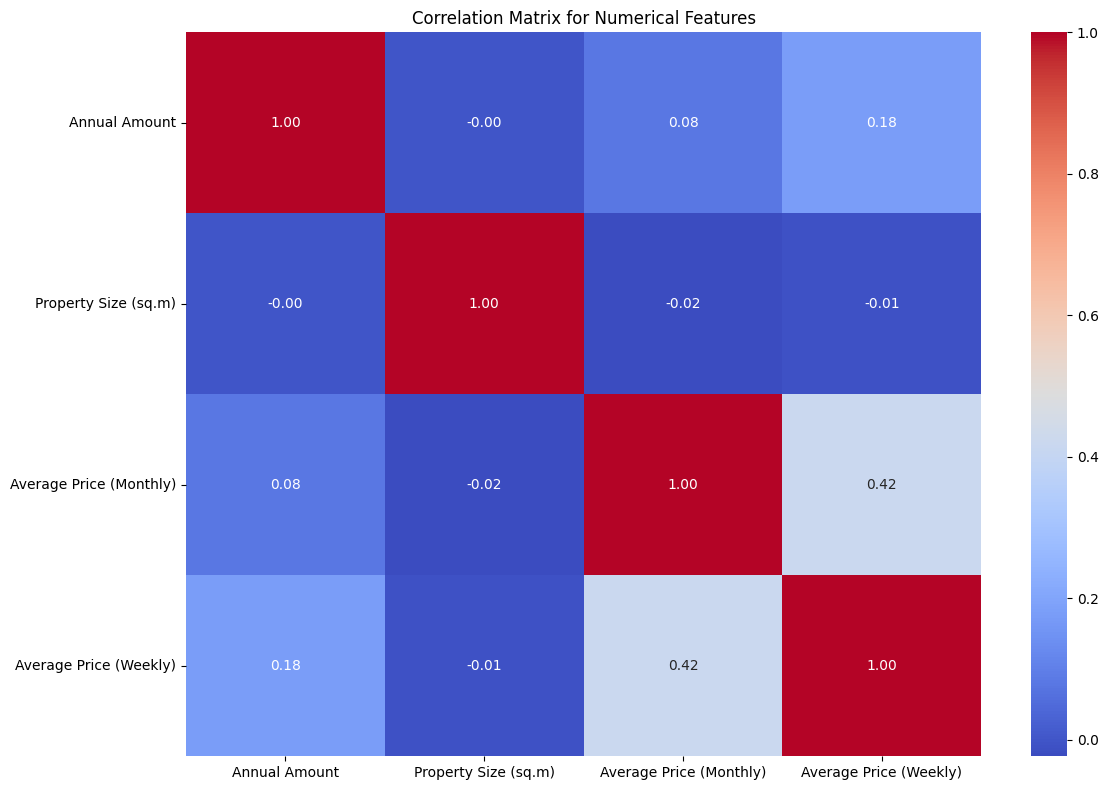

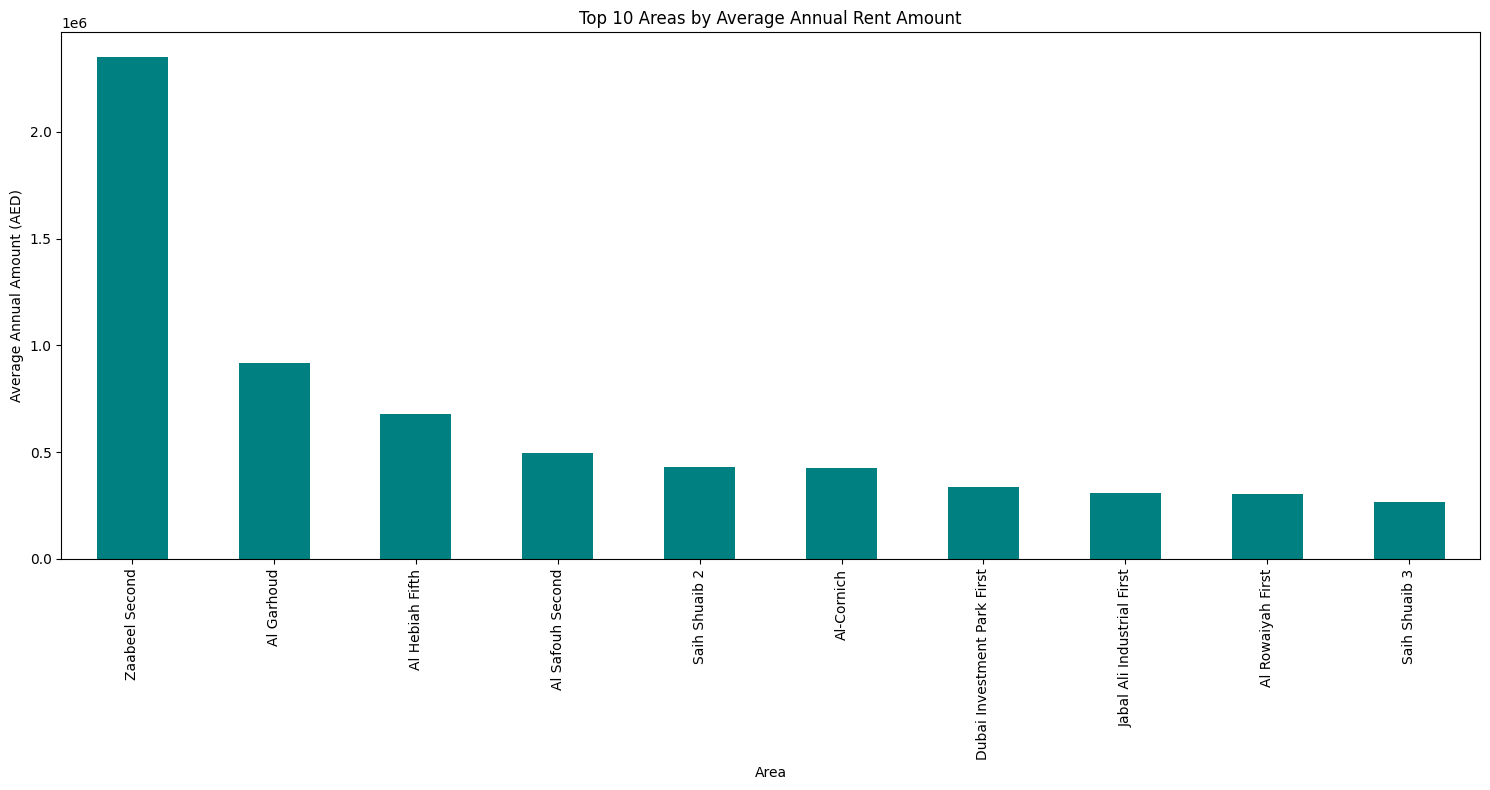

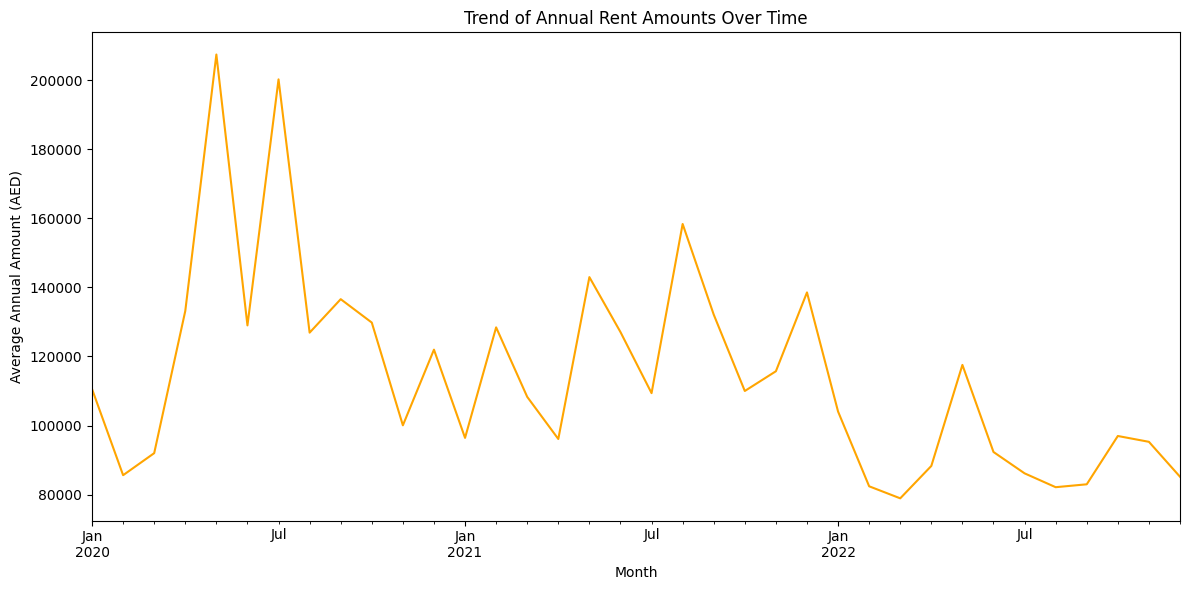

Streamlined EDA completed. Relevant graphics saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_with_averages.xlsx"
output_graphics_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS"

os.makedirs(output_graphics_path, exist_ok=True)

rents_data = pd.read_excel(file_path)

if 'Registration Date' in rents_data.columns:
    rents_data['Registration Date'] = pd.to_datetime(rents_data['Registration Date'])

plt.figure(figsize=(10, 6))
sns.histplot(rents_data['Annual Amount'], bins=50, kde=True)
plt.title('Distribution of Annual Rent Amounts')
plt.xlabel('Annual Amount (AED)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Annual_Amount_Distribution.png"))
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(rents_data['Property Size (sq.m)'], rents_data['Annual Amount'], alpha=0.5)
plt.title('Property Size vs Annual Amount')
plt.xlabel('Property Size (sq.m)')
plt.ylabel('Annual Amount (AED)')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Property_Size_vs_Annual_Amount.png"))
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(rents_data['Average Price (Monthly)'], rents_data['Annual Amount'], alpha=0.5)
plt.title('Average Monthly Price vs Annual Amount')
plt.xlabel('Average Price (Monthly)')
plt.ylabel('Annual Amount (AED)')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Average_Monthly_Price_vs_Annual_Amount.png"))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Annual Amount', data=rents_data)
plt.title('Property Type vs Annual Amount')
plt.xlabel('Property Type')
plt.ylabel('Annual Amount (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Property_Type_vs_Annual_Amount.png"))
plt.show()

numerical_columns = ['Annual Amount', 'Property Size (sq.m)', 'Average Price (Monthly)', 'Average Price (Weekly)']

plt.figure(figsize=(12, 8))
correlation_matrix = rents_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Correlation_Matrix.png"))
plt.show()

plt.figure(figsize=(15, 8))
avg_price_per_area = rents_data.groupby('Area')['Annual Amount'].mean().sort_values(ascending=False).head(10)  # Top 10 areas
avg_price_per_area.plot(kind='bar', color='teal')
plt.title('Top 10 Areas by Average Annual Rent Amount')
plt.xlabel('Area')
plt.ylabel('Average Annual Amount (AED)')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Top_10_Areas_Average_Annual_Rent.png"))
plt.show()

if 'Registration Date' in rents_data.columns:
    rents_data['Month'] = rents_data['Registration Date'].dt.to_period('M')
    monthly_trend = rents_data.groupby('Month')['Annual Amount'].mean()
    plt.figure(figsize=(12, 6))
    monthly_trend.plot(kind='line', color='orange')
    plt.title('Trend of Annual Rent Amounts Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Annual Amount (AED)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_graphics_path, "Annual_Amount_Trend.png"))
    plt.show()

print(f"Streamlined EDA completed. Relevant graphics saved to: {output_graphics_path}")


# Dubai Real Estate Price Prediction Challenge - Exploratory Data Analysis (EDA)

## Objective
The primary goal of this notebook is to perform a comprehensive Exploratory Data Analysis (EDA) on the Dubai rental dataset to identify trends, relationships, and key insights. The analysis focuses on uncovering critical drivers for annual rental amounts and preparing the dataset for predictive modeling.

---

## Steps Taken So Far

1. **Data Preprocessing**:
   - Imported the dataset from the cleaned file `rents_cleaned.xlsx`.
   - Identified and treated missing values:
     - Dropped the `Number of Rooms` column due to a high percentage of missing data.
     - Replaced missing values in categorical columns (`Area`, `Nearest Metro`, `Nearest Mall`, `Nearest Landmark`) with `"Unknown"`.
     - Handled numerical columns (`Property Size (sq.m)` and `Annual Amount`) by replacing commas with decimal points, converting to float, and filling missing values with the median.
   - Saved the cleaned dataset to a new file: `rents_cleaned_processed.xlsx`.

2. **Feature Engineering**:
   - Converted `Registration Date` into datetime format.
   - Added new temporal features:
     - `Month` and `Week` columns to enable temporal grouping.
   - Created derived features:
     - `Average Price (Monthly)`: Calculated the average rent by property type for each month.
     - `Average Price (Weekly)`: Calculated the average rent by property type for each week.
   - Saved the updated dataset to `rents_with_averages.xlsx`.

3. **Exploratory Data Analysis (EDA)**:
   - Generated key visualizations to analyze patterns in the dataset:
     - **Distribution of Annual Amounts**: Highlighted the skewness and clustering of rent values.
     - **Property Size vs Annual Amount**: Examined the relationship between size and rent, identifying outliers.
     - **Average Monthly Price vs Annual Amount**: Explored how monthly averages predict annual rents.
     - **Property Type vs Annual Amount**: Box plots revealed variability in rent across property types.
     - **Correlation Matrix**: Analyzed numerical feature correlations.
     - **Top 10 Areas by Average Annual Rent**: Identified high-rent areas for potential investment.
     - **Temporal Trend of Rents**: Observed rent fluctuations over time.

---

## Observations

### Key Insights (Detailed Explanation):

1. **Rental Distribution**:
   - The distribution of `Annual Amount` shows a heavy right skew, meaning that the majority of properties have rental amounts clustered within a lower range, predominantly below AED 1 million.
   - A small number of properties exhibit extremely high annual rents (greater than AED 2 million). These outliers are likely luxury or high-value commercial properties in premium areas, such as villas, large commercial buildings, or premium office spaces.
   - This skewed distribution indicates a high degree of variability in the rental market, driven by factors such as property type, size, and location.

2. **Property Size and Rent**:
   - The scatter plot of `Property Size (sq.m)` versus `Annual Amount` reveals a weak but noticeable positive trend—larger properties generally command higher rents.
   - Most properties fall within a typical size range, while a few extremely large properties (above 400,000 sq.m.) are outliers with disproportionately high rents. These may include industrial complexes or sprawling commercial facilities.
   - For smaller properties, the annual rent appears highly variable, suggesting that size alone is not the sole determinant of rent. This variability could be influenced by property type, location, or additional amenities.

3. **Property Types**:
   - The box plot of `Property Type` versus `Annual Amount` highlights significant variability in rent across different property types:
     - `Unit` properties show the widest range of rents, indicating their presence in both affordable and premium segments (e.g., apartments vs. high-end penthouses).
     - `Building` properties generally have higher median rents, likely due to their larger size and commercial utility.
     - `Villa` properties exhibit relatively consistent rents within a higher range, reflecting their premium residential nature.
     - `Land` properties have low variability, possibly reflecting specific zoning or usage constraints.

4. **Top Areas**:
   - The analysis of the top 10 areas by average annual rent reveals significant spatial disparities:
     - `Zaabeel Second` has the highest average rent, likely due to its premium location, proximity to key landmarks, and luxury developments.
     - Other high-rent areas like `Al Garhoud` and `Al Hebiah Fifth` are likely driven by a combination of residential desirability and commercial utility.
     - These top areas are indicative of prime real estate, making them potential hotspots for investors targeting high-yield properties.

5. **Temporal Trends**:
   - The temporal trend of average annual rents shows significant fluctuations over time:
     - Peaks observed during 2020–2021 may correspond to external factors, such as increased demand for specific property types or changes in market dynamics during the COVID-19 pandemic.
     - The subsequent decline in rents could be indicative of market correction, oversupply, or changes in tenant preferences (e.g., shifts to remote work reducing demand for commercial properties).
   - Understanding these temporal patterns is crucial for identifying cyclical trends and planning investments accordingly.

6. **Correlation Matrix**:
   - The correlation matrix for numerical features reveals:
     - A weak positive correlation between `Annual Amount` and `Average Price (Monthly)` (correlation ~0.08), suggesting that average monthly rents provide some predictive value for annual rents.
     - Minimal correlation between `Annual Amount` and `Property Size (sq.m)` (~0.00), indicating that size alone is not a strong driver of rent.
     - A moderate positive correlation between `Average Price (Monthly)` and `Average Price (Weekly)` (~0.42), as expected due to their direct derivation.
   - These weak correlations suggest that categorical variables (e.g., `Property Type`, `Area`) and spatial factors likely play a more significant role in determining rents.



## Next Step: Further Analysis

 **Investigate Outliers**:
   - Analyze high outliers in `Annual Amount` and `Property Size` for anomalies or specific patterns, such as premium locations or luxury property types.



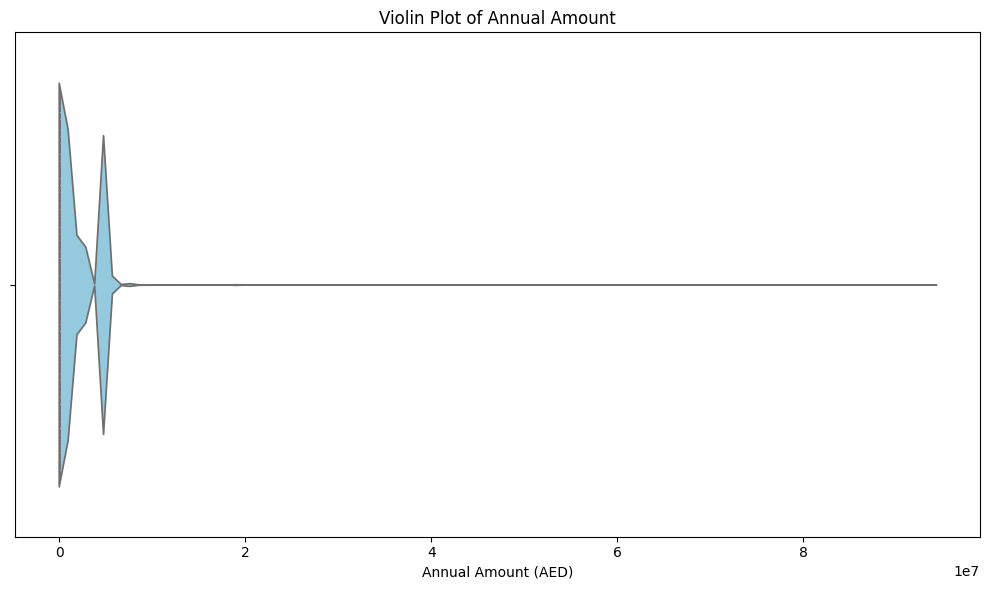

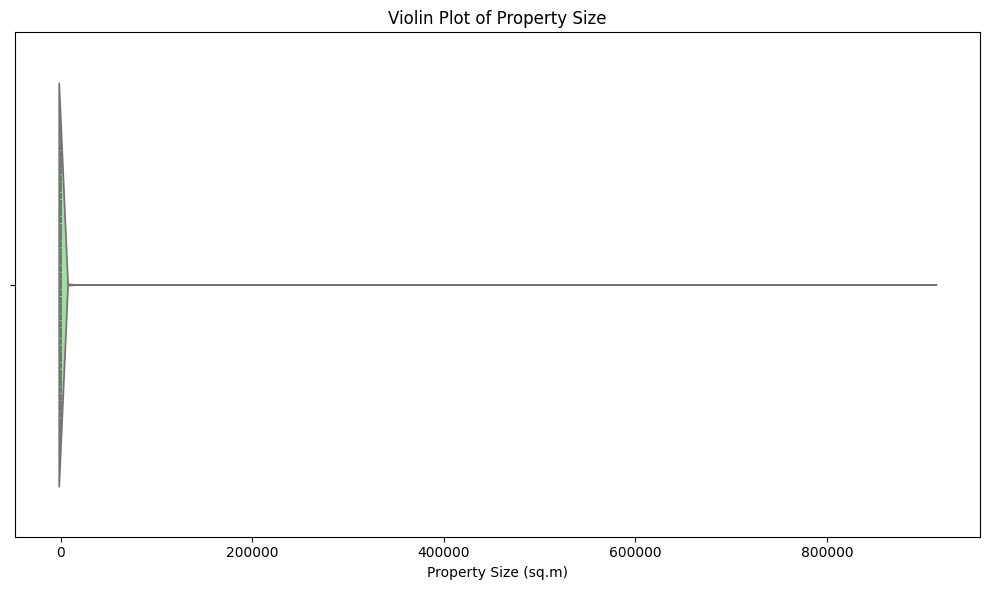

C:\Users\User\AppData\Local\Temp\ipykernel_6240\497806109.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=high_annual_amount, x='Property Type', y='Annual Amount', jitter=True, alpha=0.7, palette="viridis")


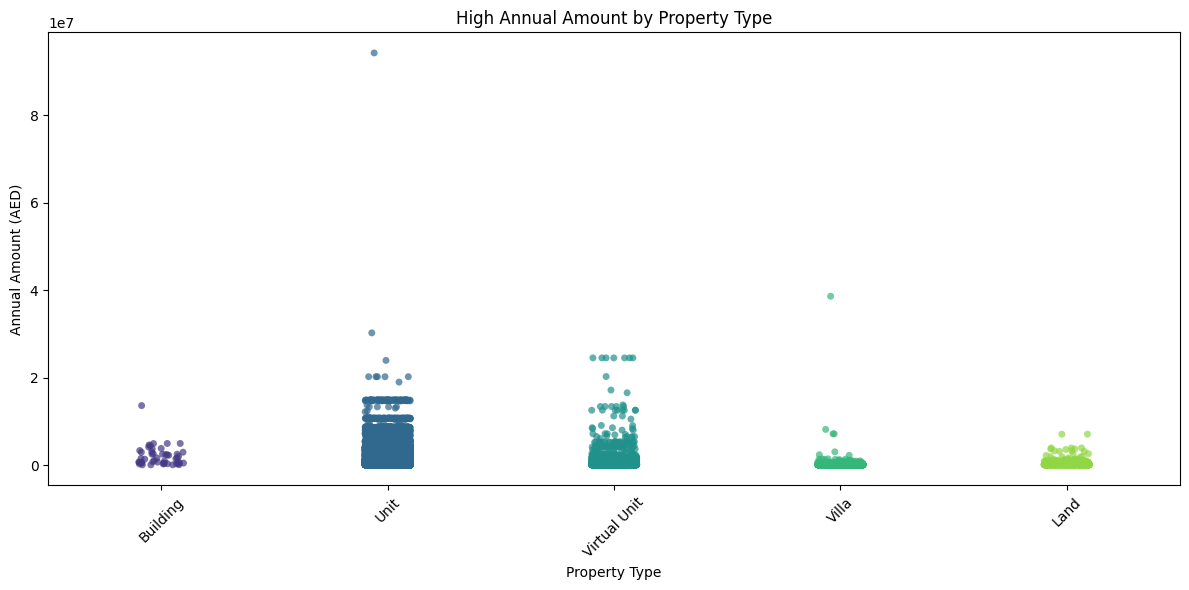

C:\Users\User\AppData\Local\Temp\ipykernel_6240\497806109.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=high_property_size, x='Property Type', y='Property Size (sq.m)', jitter=True, alpha=0.7, palette="coolwarm")


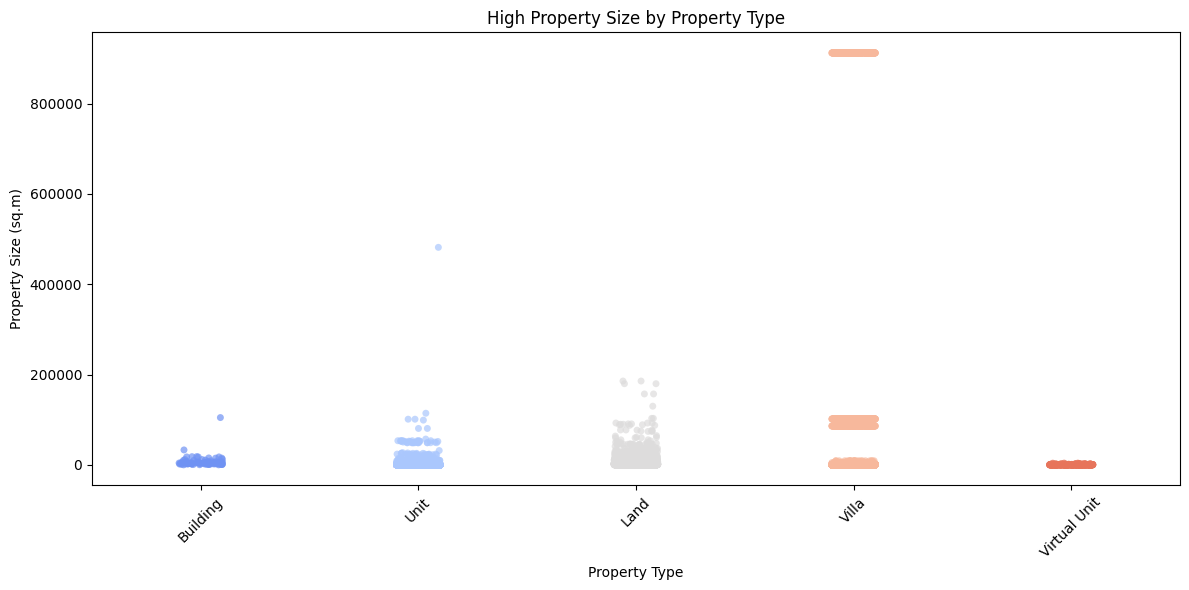

C:\Users\User\AppData\Local\Temp\ipykernel_6240\497806109.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_areas.values, y=top_high_areas.index, palette="mako")


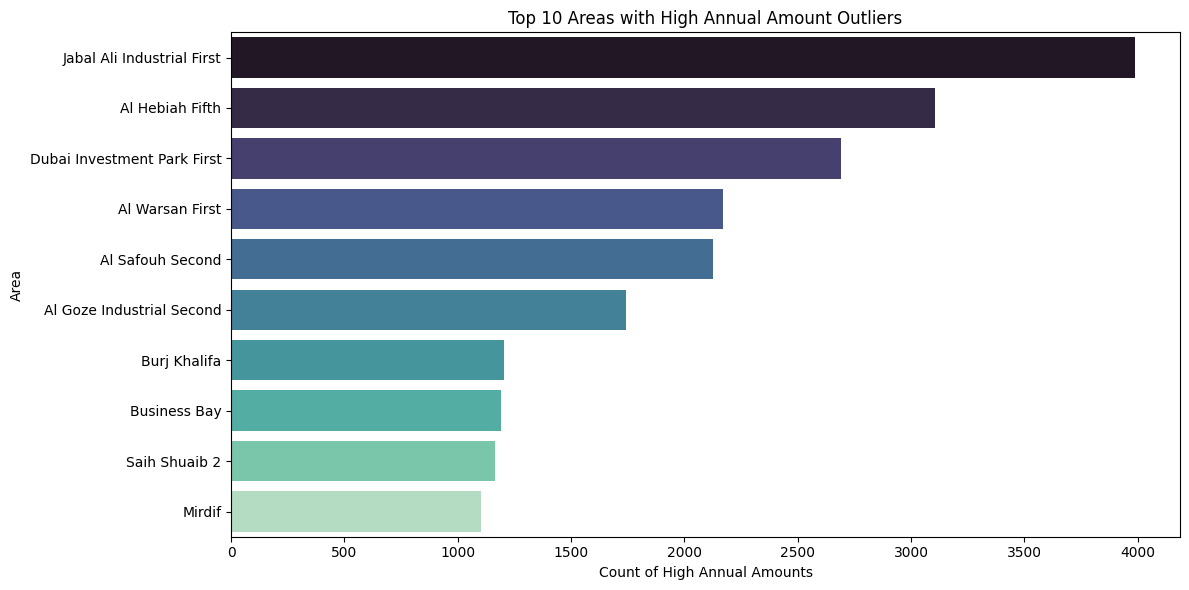

C:\Users\User\AppData\Local\Temp\ipykernel_6240\497806109.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_size_areas.values, y=top_high_size_areas.index, palette="rocket")


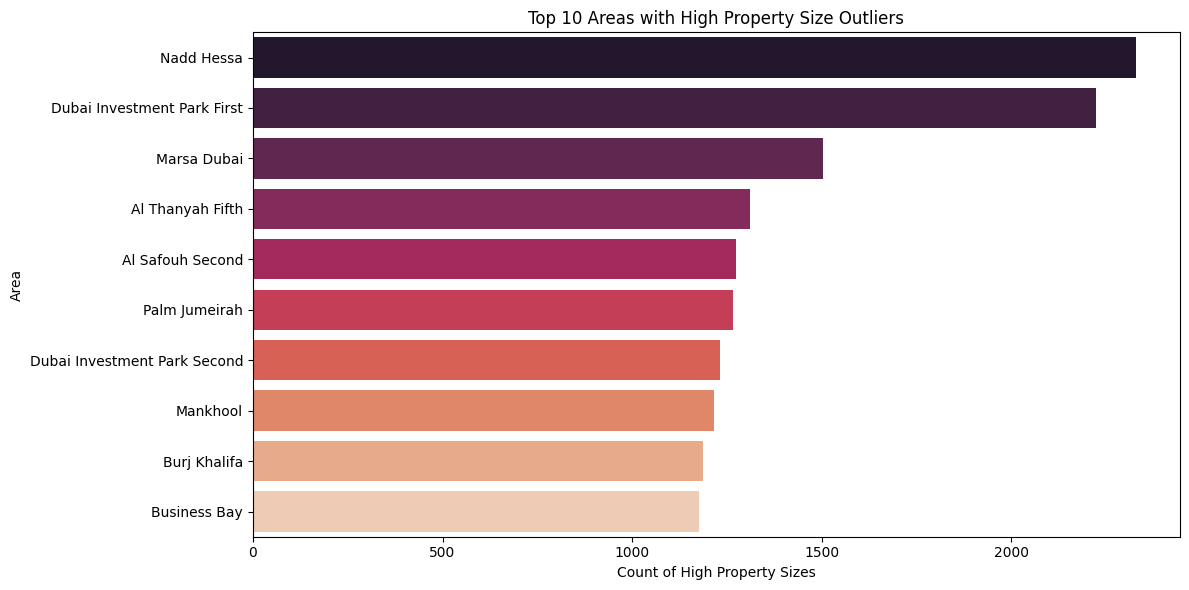

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_with_averages.xlsx"
output_graphics_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS"

os.makedirs(output_graphics_path, exist_ok=True)

rents_data = pd.read_excel(file_path)

rents_data['Annual Amount'] = pd.to_numeric(rents_data['Annual Amount'], errors='coerce')
rents_data['Property Size (sq.m)'] = pd.to_numeric(rents_data['Property Size (sq.m)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(data=rents_data, x=rents_data['Annual Amount'], inner="quartile", color="skyblue")
plt.title('Violin Plot of Annual Amount')
plt.xlabel('Annual Amount (AED)')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Violin_Annual_Amount.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=rents_data, x=rents_data['Property Size (sq.m)'], inner="quartile", color="lightgreen")
plt.title('Violin Plot of Property Size')
plt.xlabel('Property Size (sq.m)')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Violin_Property_Size.png"))
plt.show()

high_annual_amount = rents_data[rents_data['Annual Amount'] > rents_data['Annual Amount'].quantile(0.95)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=high_annual_amount, x='Property Type', y='Annual Amount', jitter=True, alpha=0.7, palette="viridis")
plt.title('High Annual Amount by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Annual Amount (AED)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "High_Annual_Amount_By_Property_Type.png"))
plt.show()

high_property_size = rents_data[rents_data['Property Size (sq.m)'] > rents_data['Property Size (sq.m)'].quantile(0.95)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=high_property_size, x='Property Type', y='Property Size (sq.m)', jitter=True, alpha=0.7, palette="coolwarm")
plt.title('High Property Size by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Size (sq.m)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "High_Property_Size_By_Property_Type.png"))
plt.show()

plt.figure(figsize=(12, 6))
top_high_areas = high_annual_amount['Area'].value_counts().head(10)
sns.barplot(x=top_high_areas.values, y=top_high_areas.index, palette="mako")
plt.title('Top 10 Areas with High Annual Amount Outliers')
plt.xlabel('Count of High Annual Amounts')
plt.ylabel('Area')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Top_High_Annual_Amount_Areas.png"))
plt.show()

plt.figure(figsize=(12, 6))
top_high_size_areas = high_property_size['Area'].value_counts().head(10)
sns.barplot(x=top_high_size_areas.values, y=top_high_size_areas.index, palette="rocket")
plt.title('Top 10 Areas with High Property Size Outliers')
plt.xlabel('Count of High Property Sizes')
plt.ylabel('Area')
plt.tight_layout()
plt.savefig(os.path.join(output_graphics_path, "Top_High_Property_Size_Areas.png"))
plt.show()


# Insights and Observations from High Outliers Analysis

## High Outliers in Property Size
1. **Top Areas with Large Property Sizes:**
   - Areas such as **Nadd Hessa**, **Dubai Investment Park First**, and **Marsa Dubai** stand out for having the largest properties.
   - These areas likely feature industrial, commercial, or premium residential developments.
   - **Palm Jumeirah** being on this list aligns with its reputation for luxurious, expansive villas.

2. **Property Type and Size:**
   - **Villas** and **Lands** dominate large property sizes, consistent with their natural requirement for more space.
   - Interestingly, **Virtual Units** appear with large property sizes, raising questions about whether this is a data anomaly or if these represent unique cases (e.g., industrial zones or high-tech commercial facilities).

## High Outliers in Annual Amount
1. **Top Areas with High Rent/Annual Amounts:**
   - **Jabal Ali Industrial First**, **Al Hebiah Fifth**, and **Dubai Investment Park First** are the top areas with high annual amounts.
   - These regions are likely hubs for industrial or premium commercial properties, driving higher rental values.
   - **Business Bay** and **Burj Khalifa** also feature prominently, reflecting their status as high-demand, premium locations.

2. **Property Type and Annual Amount:**
   - **Buildings** and **Units** show the widest range of high annual amounts, reflecting variability in their usage (e.g., residential apartments, premium commercial units, and mixed-use buildings).
   - **Villas**, known for their luxury, exhibit high annual amounts as expected.

## Distribution Insights
1. **Annual Amount Distribution:**
   - The violin plot shows most properties clustered at lower annual amounts, indicating affordability or mid-range values.
   - A long tail of outliers represents premium or high-value properties.

2. **Property Size Distribution:**
   - Similarly, the violin plot for property size reveals that most properties are smaller, with a few large outliers dominating the high end.

## Key Patterns and Relationships
1. **Area Influence:**
   - Specific areas such as **Dubai Investment Park First**, **Al Safouh Second**, and **Business Bay** consistently appear among the top for both property size and annual amount. These areas are likely high-demand zones for either luxury or specialized property use.

2. **Property Type Influence:**
   - **Villas** and **Lands** dominate property sizes, while **Units** and **Buildings** exhibit significant variability in annual amounts. This suggests diverse uses within these categories, from affordable housing to high-end commercial spaces.

---



# FEATURES CREATION FOR RENTS FILE 

In [13]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_with_averages.xlsx"
output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_with_features.xlsx"

rents_data = pd.read_excel(file_path)

rents_data['Annual Amount'] = pd.to_numeric(rents_data['Annual Amount'], errors='coerce')
rents_data['Property Size (sq.m)'] = pd.to_numeric(rents_data['Property Size (sq.m)'], errors='coerce')

rents_data['Price per Sq.m'] = rents_data['Annual Amount'] / rents_data['Property Size (sq.m)']
rents_data['Price per Sq.m'] = rents_data['Price per Sq.m'].replace([np.inf, -np.inf], np.nan)

median_annual_amount_by_area = rents_data.groupby('Area')['Annual Amount'].median().reset_index()
median_annual_amount_by_area.rename(columns={'Annual Amount': 'Median Annual Amount'}, inplace=True)
rents_data = rents_data.merge(median_annual_amount_by_area, on='Area', how='left')

metro_density = rents_data['Nearest Metro'].value_counts().reset_index()
metro_density.columns = ['Nearest Metro', 'Metro Density']
rents_data = rents_data.merge(metro_density, on='Nearest Metro', how='left')

median_annual_by_usage = rents_data.groupby('Usage')['Annual Amount'].median().reset_index()
median_annual_by_usage.rename(columns={'Annual Amount': 'Median Usage Annual Amount'}, inplace=True)
rents_data = rents_data.merge(median_annual_by_usage, on='Usage', how='left')

high_value_threshold = rents_data['Median Annual Amount'].quantile(0.9)
rents_data['High-Value Area'] = rents_data['Median Annual Amount'] >= high_value_threshold


rents_data.sort_values(by=['Area', 'Month'], inplace=True)
rents_data['Price Growth (Monthly)'] = rents_data.groupby('Area')['Average Price (Monthly)'].pct_change() * 100

rents_data['Quarter'] = rents_data['Month'].str[:4] + "-Q" + ((pd.to_datetime(rents_data['Month']).dt.month - 1) // 3 + 1).astype(str)
rents_data['Price Growth (Quarterly)'] = rents_data.groupby(['Area', 'Quarter'])['Average Price (Monthly)'].transform(lambda x: x.pct_change() * 100)

rents_data.to_excel(output_file_path, index=False)

print("New features created and saved to:", output_file_path)


New features created and saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_with_features.xlsx


## Why I Chose to Create These New Features

In the process of analyzing the dataset and preparing it for machine learning models, I identified key features that could significantly improve both interpretability and predictive accuracy. Below is a detailed explanation of why I chose to create these features and how they contribute to understanding the real estate market in Dubai.

---

### **1. Price per Square Meter**
I created the `Price per Sq.m` feature to standardize the property pricing across varying property sizes. Real estate prices can differ significantly based on the size of the property, and this metric allows for a more direct comparison between properties of different sizes. 

For example:
- Larger properties may have a lower price per square meter than smaller properties in the same area.

By incorporating this feature, I can better understand and model the value of properties relative to their size, ensuring size-related price dynamics are captured effectively.

---

### **2. Median Annual Amount by Area**
The `Median Annual Amount` by area was created to capture the typical property value in each neighborhood. This feature is crucial for identifying trends and comparing areas.

- **Why Median?** Median values are less sensitive to outliers than averages, making it particularly reliable for areas where a few extreme property prices could distort the results.

Including this feature enables us to:
- Identify high-value neighborhoods.
- Analyze how location impacts property prices.

---

### **3. Metro Density**
Proximity to public transportation is a key driver of real estate prices. To quantify this, I approximated metro density as the count of properties near each metro station. 

- **Why Metro Density?** Properties in areas with a higher metro density may be more desirable due to convenience, potentially commanding higher prices.

This feature helps evaluate the impact of metro accessibility on property values and can highlight areas with better transportation infrastructure.

---

### **4. Usage Price Ratios**
The `Median Usage Annual Amount` feature captures the median annual rent for properties grouped by their usage type (e.g., residential, commercial, industrial). 

- **Why is this important?** Different usage types often follow distinct pricing patterns. For instance:
  - Residential properties might have steadier pricing trends compared to industrial or commercial ones.

This feature allows us to:
- Analyze how usage affects property prices.
- Ensure the models can differentiate between property types effectively.

---

### **5. High-Value Area Indicator**
To identify premium locations, I created a binary indicator called `High-Value Area`. This feature flags areas where the `Median Annual Amount` is in the top 10% of all areas.

- **Why High-Value Areas?** High-value areas often indicate:
  - Higher demand.
  - Better infrastructure.
  - Proximity to key landmarks.

This feature is critical for:
- Understanding the distribution of luxury properties.
- Helping models focus on distinguishing factors for high-value properties.

---

### **6. Price Growth (Monthly/Quarterly)**
Understanding price trends over time is essential in real estate analysis. I introduced two features to capture temporal price dynamics:
1. **`Price Growth (Monthly)`**: Calculates the percentage change in average monthly prices compared to the previous month. This highlights short-term price fluctuations and market trends.
2. **`Price Growth (Quarterly)`**: Tracks percentage changes in average prices quarter-over-quarter. Quarterly trends are particularly useful for detecting broader market cycles and seasonal effects.

- **Why Price Growth?** These growth features are invaluable for identifying patterns of:
  - Increasing or decreasing property demand.
  - Emerging hot spots or market saturation.

---

### **Overall Objective**
Each of these features was designed to address specific aspects of the real estate market, such as:
- Location desirability.
- Size standardization.
- Price trends.
- Property usage.

By creating these features, I aim to:
1. **Enhance the interpretability of the dataset.**
2. **Provide meaningful insights into the factors influencing property prices.**
3. **Improve the performance of predictive models** by supplying them with well-defined and informative variables.

These features position us better to answer key business questions and develop robust machine learning models for predicting rental and sale prices.


# Transaction file 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned.xlsx"
output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.xlsx"

transactions = pd.read_excel(file_path)


transactions['Transaction Size (sq.m)'] = transactions['Transaction Size (sq.m)'].abs()
transactions['Property Size (sq.m)'] = transactions['Property Size (sq.m)'].abs()

def cap_outliers(series):
    lower_limit = series.quantile(0.01)
    upper_limit = series.quantile(0.99)
    return np.clip(series, lower_limit, upper_limit)

transactions['Amount'] = cap_outliers(transactions['Amount'])
transactions['Transaction Size (sq.m)'] = cap_outliers(transactions['Transaction Size (sq.m)'])
transactions['Property Size (sq.m)'] = cap_outliers(transactions['Property Size (sq.m)'])

transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'], errors='coerce')

transactions['Transaction Year'] = transactions['Transaction Date'].dt.year
transactions['Transaction Month'] = transactions['Transaction Date'].dt.month

missing_columns = ['Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
for col in missing_columns:
    transactions[f'{col}_Missing'] = transactions[col].isna().astype(int)

text_columns = ['Usage', 'Property Type', 'Property Sub Type', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
transactions[text_columns] = transactions[text_columns].apply(lambda col: col.str.strip().str.lower())

transactions['Size Consistency'] = transactions['Transaction Size (sq.m)'] <= transactions['Property Size (sq.m)']

scaler = MinMaxScaler()
numerical_columns = ['Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)']
transactions[numerical_columns] = scaler.fit_transform(transactions[numerical_columns])

transactions.to_excel(output_file_path, index=False)

print("Dataset has been processed and saved to:", output_file_path)


Dataset has been processed and saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.xlsx


# Preprocessing Steps for Transaction Data

Before conducting the Exploratory Data Analysis (EDA), I processed the transaction dataset to ensure data quality, consistency, and readiness for analysis. Below, I describe each step I took to preprocess the data:

## 1. Handling Negative and Extreme Values
- **Negative Values:** I replaced any negative values in the columns `Transaction Size (sq.m)` and `Property Size (sq.m)` with their absolute values. This step ensures all measurements are positive since size cannot logically be negative.
- **Capping Extreme Values:** For columns like `Amount`, `Transaction Size (sq.m)`, and `Property Size (sq.m)`, I capped the extreme outliers using the 1st and 99th percentiles as thresholds. This helps to reduce the impact of outliers on the analysis and models. Here's how I implemented the capping:
  - I calculated the 1st and 99th percentiles for each relevant column.
  - Any value below the 1st percentile was replaced with the 1st percentile value, and values above the 99th percentile were replaced with the 99th percentile value.

## 2. Converting Dates to `datetime`
- I converted the `Transaction Date` column to a `datetime` format to enable temporal analysis. Invalid dates were automatically coerced into `NaT` for easier handling of missing or incorrect date entries.

## 3. Extracting Temporal Features
- To capture time-based trends, I extracted two new features from the `Transaction Date`:
  - **`Transaction Year`**: The year in which the transaction occurred.
  - **`Transaction Month`**: The month in which the transaction occurred.

## 4. Adding Missing Value Indicators
- For key location-related columns (`Nearest Metro`, `Nearest Mall`, `Nearest Landmark`), I created binary indicator columns (`<Column_Name>_Missing`) to capture whether a value is missing in these columns. This is particularly useful for analyzing the potential impact of missing data on outcomes.

## 5. Standardizing Categorical Values
- I standardized text-based categorical columns (`Usage`, `Property Type`, `Property Sub Type`, `Nearest Metro`, `Nearest Mall`, `Nearest Landmark`) by:
  - Stripping unnecessary spaces.
  - Converting all values to lowercase for consistency.

## 6. Verifying Data Consistency
- To ensure consistency in size-related columns:
  - I created a new column, `Size Consistency`, to verify if `Transaction Size (sq.m)` is less than or equal to `Property Size (sq.m)`. This ensures that the transaction size is logical in comparison to the total property size.

## 7. Normalizing Numerical Values
- I normalized the numerical columns (`Amount`, `Transaction Size (sq.m)`, `Property Size (sq.m)`) using Min-Max Scaling. This transformation scales values to a range of 0 to 1, which is helpful for models sensitive to feature magnitude.

## 8. Saving the Processed Dataset
- Finally, I saved the processed dataset to a new file to preserve the original dataset and ensure reproducibility. The cleaned and processed file was saved at the following path:


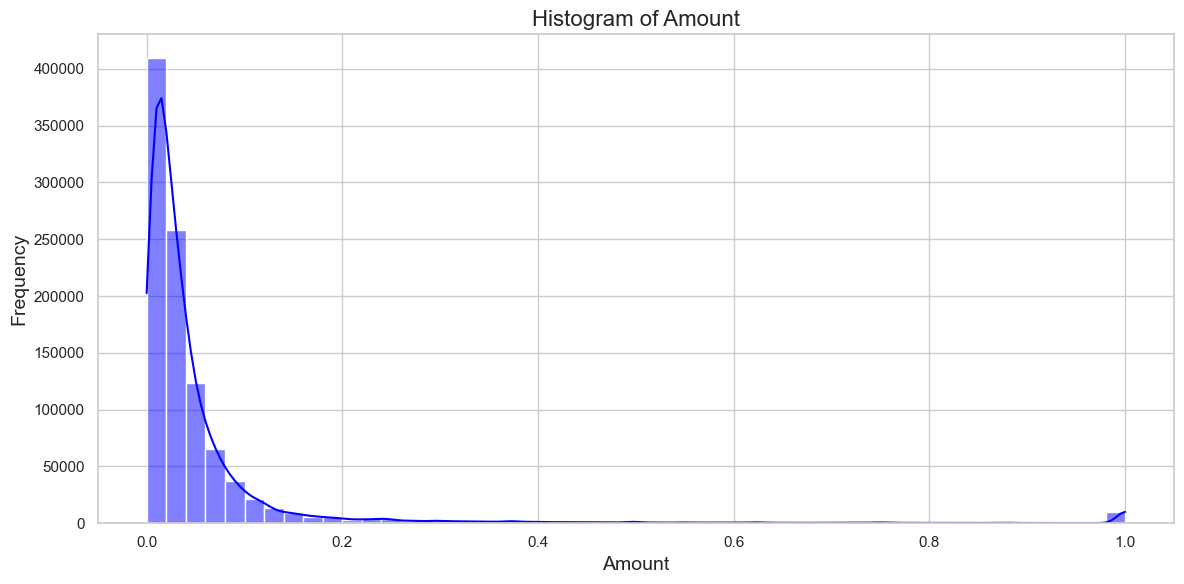

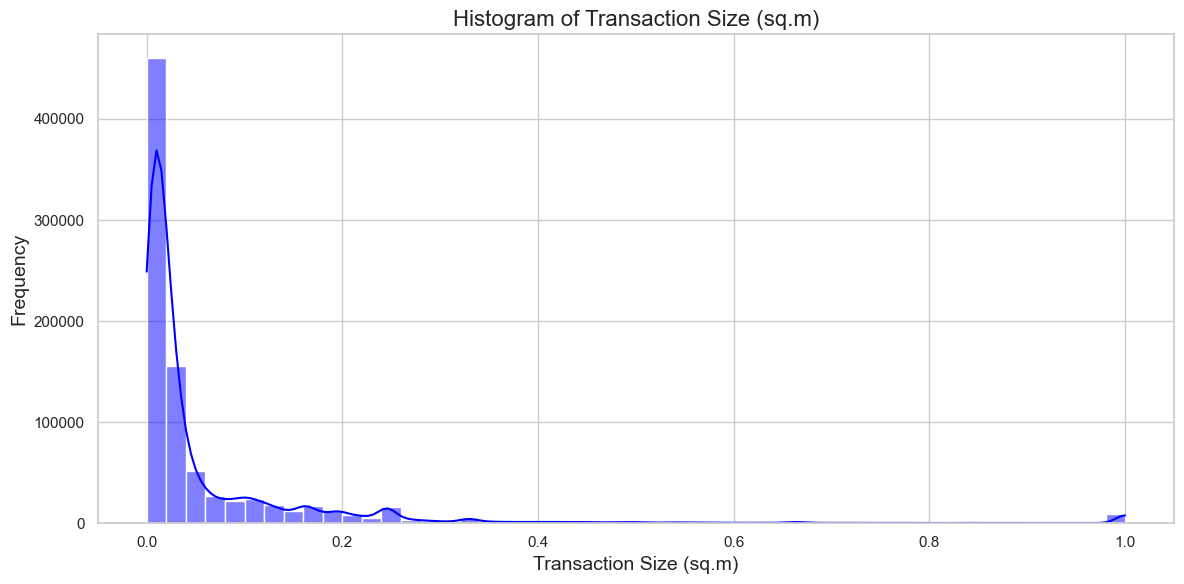

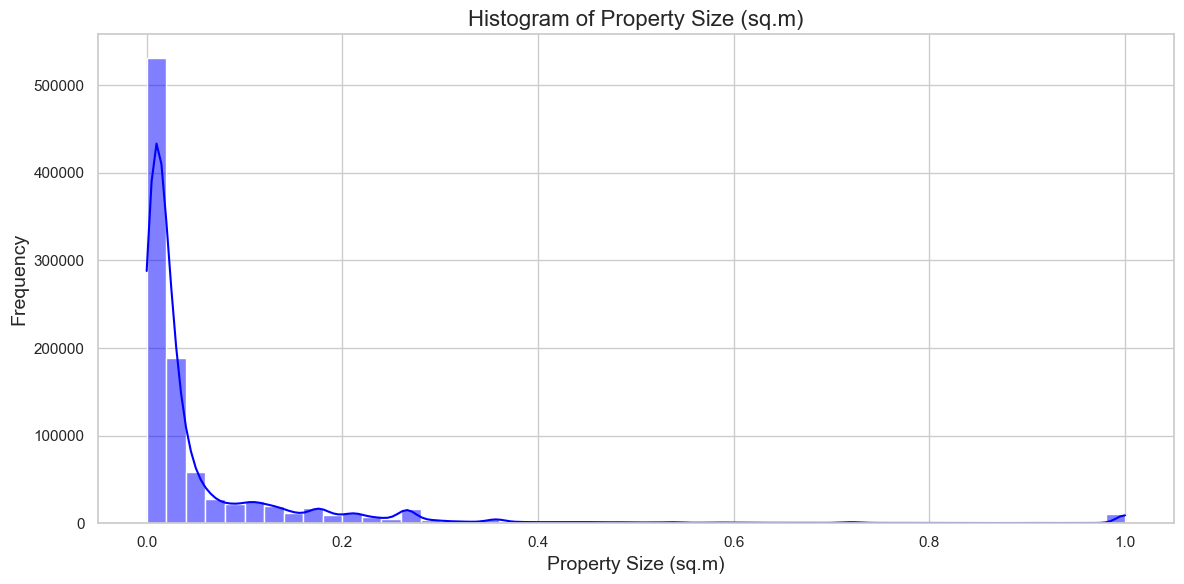

C:\Users\User\AppData\Local\Temp\ipykernel_12344\3816621326.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, y=feature, order=transactions[feature].value_counts().index, palette="coolwarm")


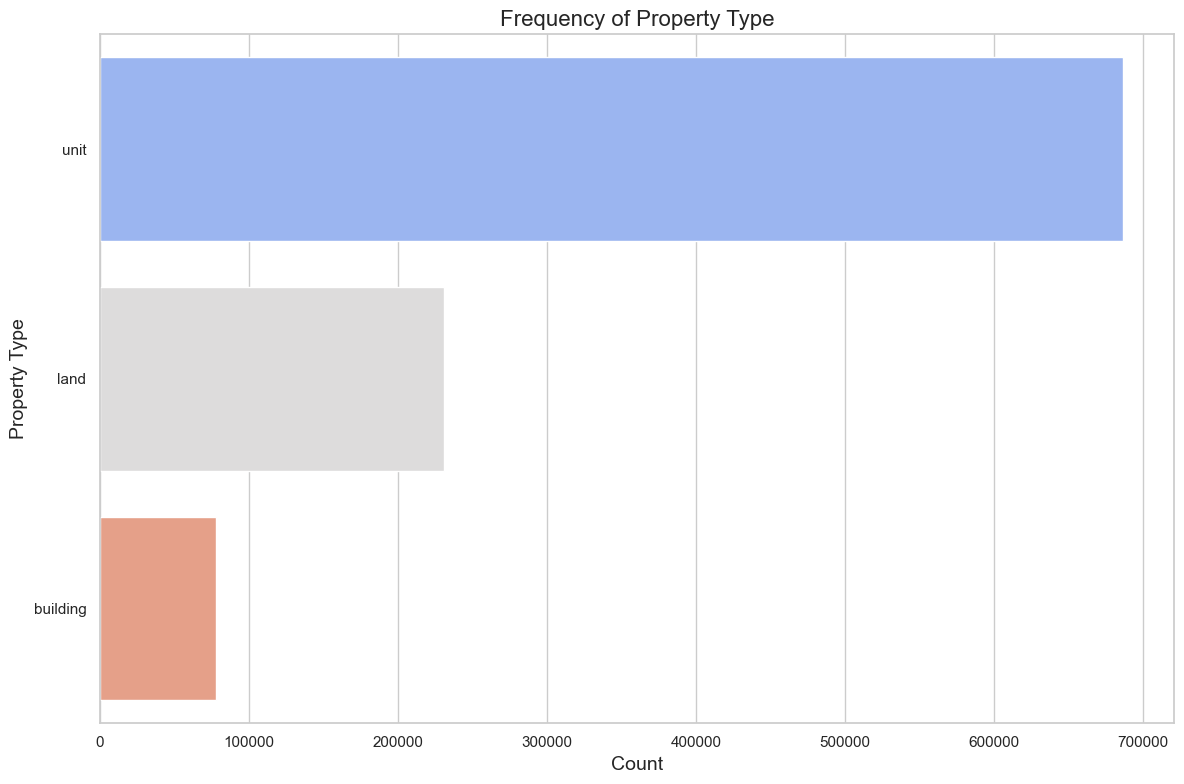

C:\Users\User\AppData\Local\Temp\ipykernel_12344\3816621326.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, y=feature, order=transactions[feature].value_counts().index, palette="coolwarm")


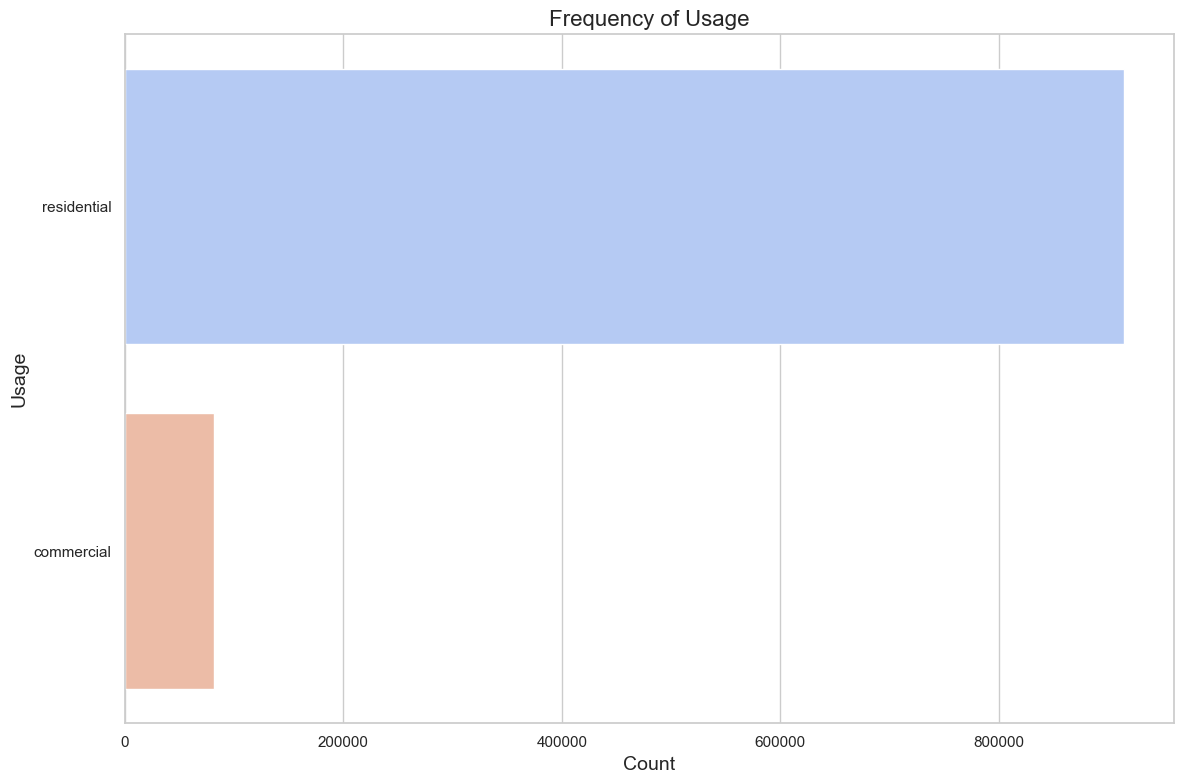

C:\Users\User\AppData\Local\Temp\ipykernel_12344\3816621326.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions, y=feature, order=transactions[feature].value_counts().index, palette="coolwarm")


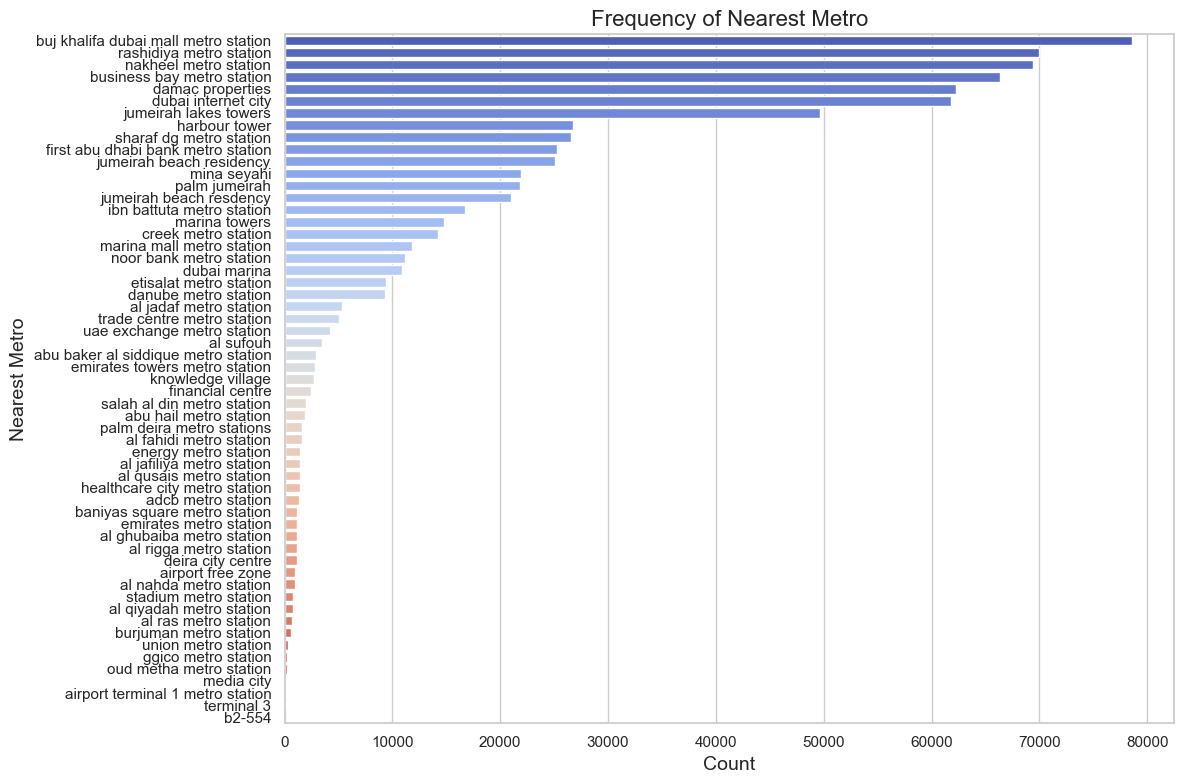

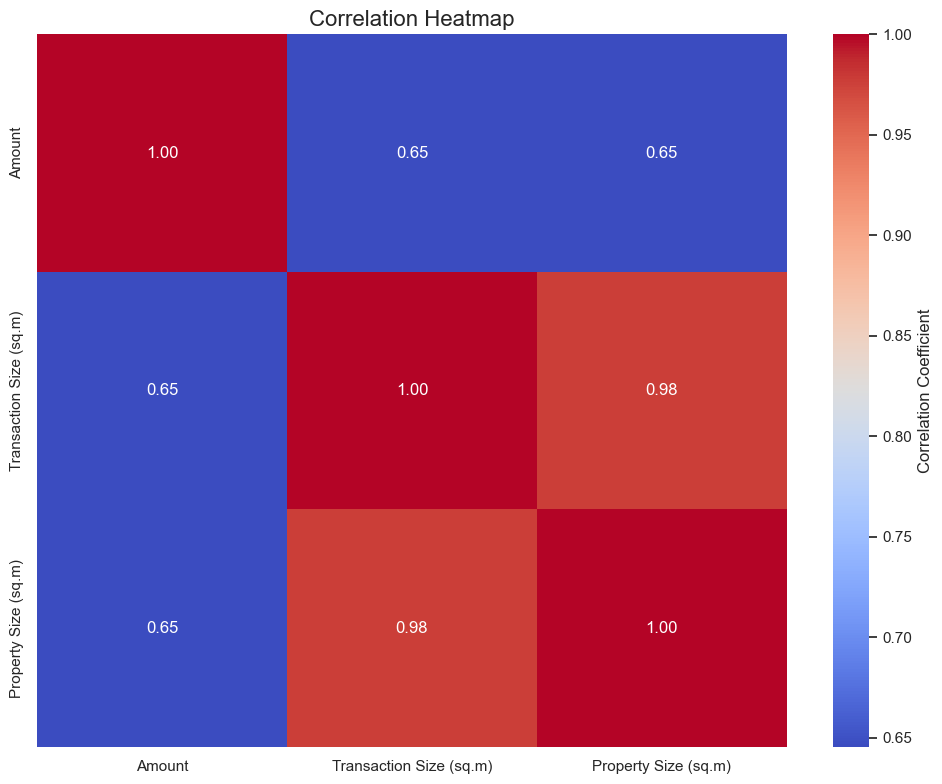

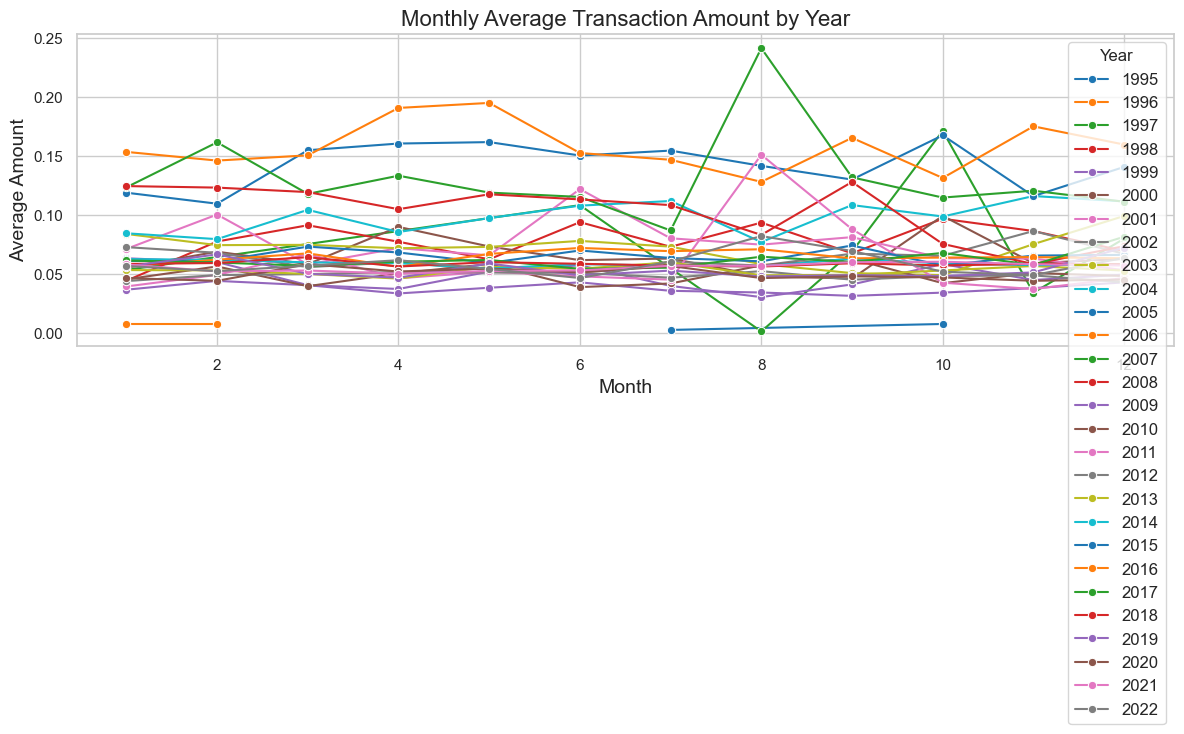

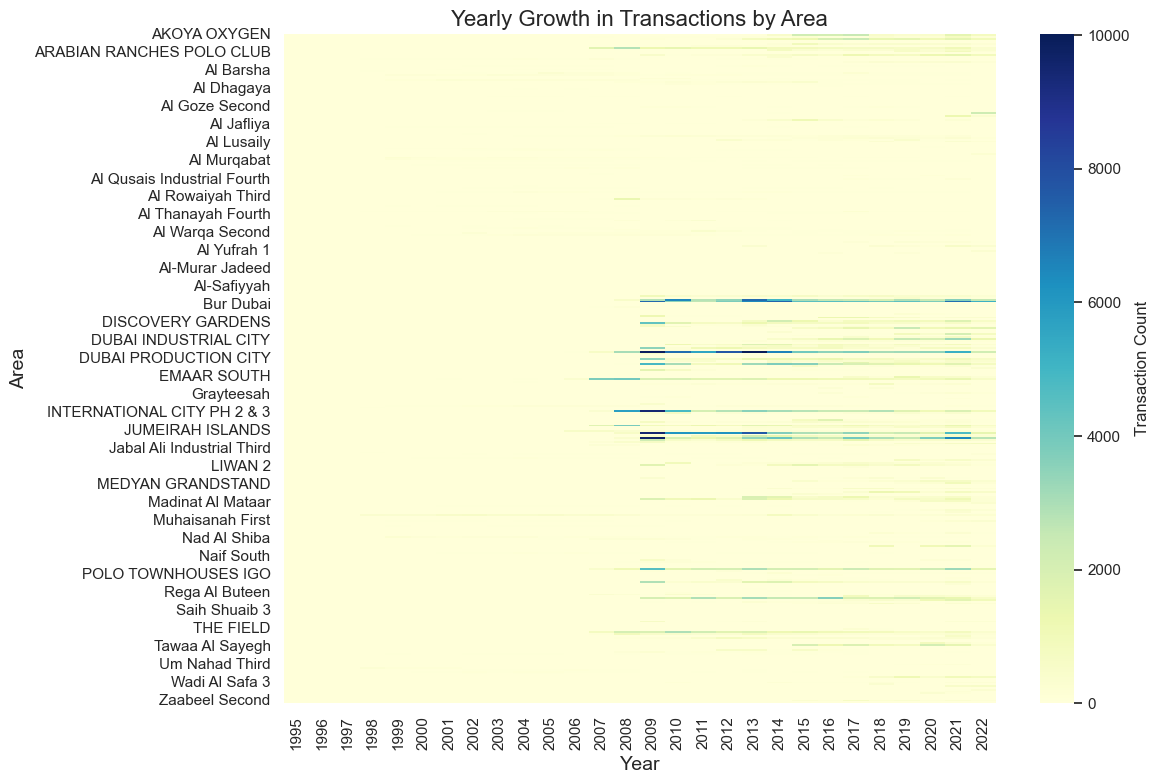

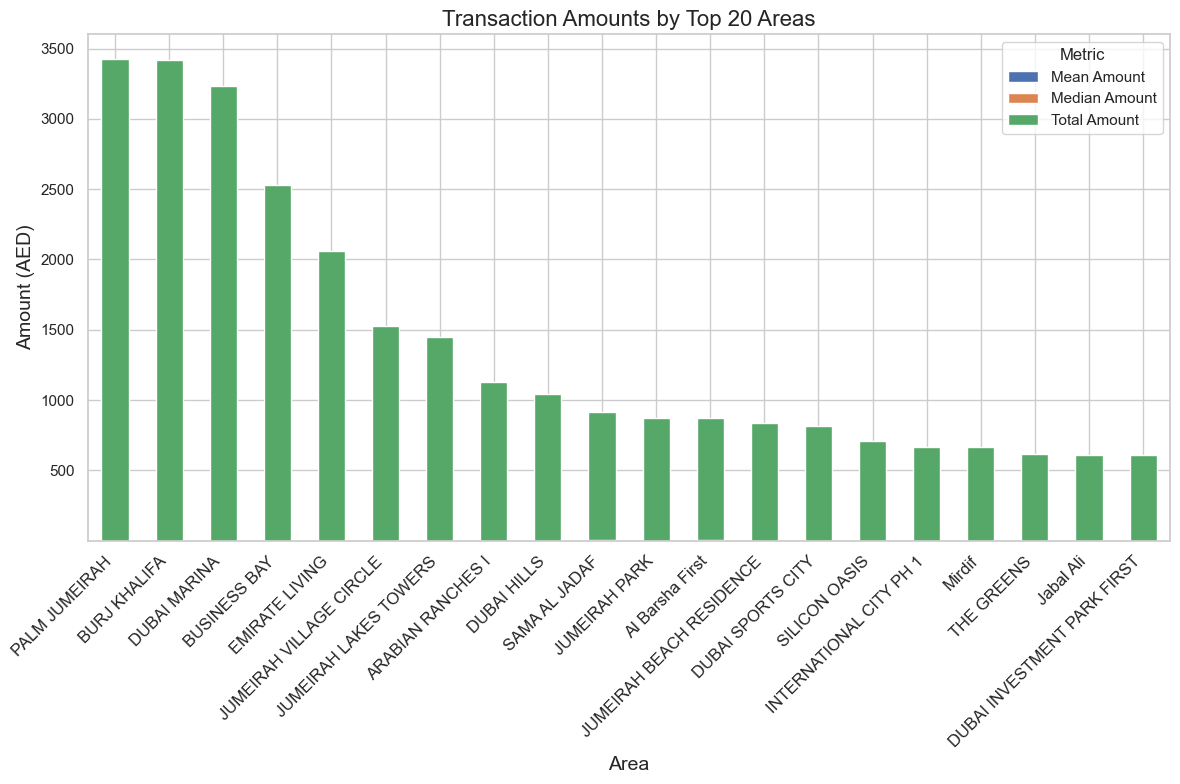

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.xlsx"
output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\EDA TRANSACTION"
transactions = pd.read_excel(file_path)

os.makedirs(output_dir, exist_ok=True)

sns.set_theme(style="whitegrid")

numerical_features = ['Amount', 'Transaction Size (sq.m)', 'Property Size (sq.m)']

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(transactions[feature], kde=True, color="blue", bins=50)
    plt.title(f"Histogram of {feature}", fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"Histogram_{feature}.png"), dpi=300)
    plt.show()

categorical_features = ['Property Type', 'Usage', 'Nearest Metro']

for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=transactions, y=feature, order=transactions[feature].value_counts().index, palette="coolwarm")
    plt.title(f"Frequency of {feature}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"Frequency_{feature}.png"), dpi=300)
    plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = transactions[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Correlation_Heatmap.png"), dpi=300)
plt.show()


monthly_data = transactions.groupby(['Transaction Year', 'Transaction Month']).agg({
    'Amount': 'mean',
    'Property ID': 'count'
}).reset_index()
monthly_data.rename(columns={"Property ID": "Transaction Count"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x="Transaction Month", y="Amount", hue="Transaction Year", palette="tab10", marker="o")
plt.title("Monthly Average Transaction Amount by Year", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Amount", fontsize=14)
plt.legend(title="Year", loc="upper right", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Monthly_Transaction_Amount.png"), dpi=300)
plt.show()

yearly_data = transactions.groupby(['Transaction Year', 'Area']).agg({
    'Amount': 'sum',
    'Property ID': 'count'
}).reset_index()
yearly_data.rename(columns={"Property ID": "Transaction Count"}, inplace=True)

pivot_data = yearly_data.pivot(index="Area", columns="Transaction Year", values="Transaction Count").fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Transaction Count'})
plt.title("Yearly Growth in Transactions by Area", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Area", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Yearly_Growth_Transactions.png"), dpi=300)
plt.show()


area_data = transactions.groupby('Area').agg({
    'Amount': ['mean', 'median', 'sum']
}).reset_index()
area_data.columns = ['Area', 'Mean Amount', 'Median Amount', 'Total Amount']

top_areas = area_data.nlargest(20, 'Total Amount')

top_areas.set_index('Area')[['Mean Amount', 'Median Amount', 'Total Amount']].plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title("Transaction Amounts by Top 20 Areas", fontsize=16)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Amount (AED)", fontsize=14)
plt.legend(title="Metric", loc="upper right")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Transaction_Amounts_By_Top_Areas.png"), dpi=300)
plt.show()


# Insights from EDA Graphs

## 1. Histogram of Amount
The histogram for the transaction amounts reveals a heavy right skew, with the majority of transactions occurring within the lower range of values. This skewness indicates that most transactions involve properties that fall within affordable to mid-range pricing brackets. The presence of a long tail highlights a small number of transactions involving luxury or high-value properties. These high-value transactions, although rare, contribute significantly to the total monetary value of the market.

- **Distribution:** The data is concentrated around lower transaction amounts, tapering off sharply as values increase.
- **High-Value Transactions:** The tail represents outliers, which likely correspond to premium or high-demand properties, often seen in luxury neighborhoods or unique developments.

---

## 2. Histogram of Transaction Size (sq.m)
The histogram of transaction sizes also shows right skewness, indicating that most properties sold or rented are smaller in size. The frequency decreases as the property size increases, which suggests that larger properties (e.g., villas or commercial spaces) are less common in the dataset.

- **Small Properties Dominance:** Smaller units are more frequent, likely reflecting a focus on urban housing or compact residential units.
- **Larger Properties:** The tail contains fewer transactions, corresponding to properties such as large villas, warehouses, or commercial real estate.

---

## 3. Histogram of Property Size (sq.m)
The histogram of property size mirrors the distribution observed in transaction size, with a right-skewed distribution. Most properties are on the smaller side, aligning with the urban housing demand. Larger properties are less frequent and likely represent niche segments of the market.

- **Compact Housing Trends:** A majority of properties have smaller footprints, emphasizing the prevalence of apartments or compact residential units.
- **Luxury or Commercial Developments:** Larger properties in the tail suggest high-value transactions that cater to a limited clientele.

---

## 4. Frequency of Property Type
The frequency chart shows that **units** (apartments or flats) are by far the most common property type, followed by **land** and then **buildings**. This distribution underscores the dominance of high-density residential development in the dataset.

- **Units:** The largest proportion, reflecting the popularity of apartments, especially in urban and suburban developments.
- **Land:** Represents a smaller segment, likely purchased for development purposes or large-scale investment.
- **Buildings:** The least frequent, often corresponding to entire buildings purchased for commercial or investment use.

---

## 5. Frequency of Usage
The chart indicates a stark difference in usage distribution, with **residential properties** being the overwhelming majority. Commercial properties form a much smaller segment of the market.

- **Residential:** These properties dominate the dataset, suggesting a focus on housing demand, driven by population growth and expatriate influx.
- **Commercial:** Limited representation in the dataset, likely concentrated in specific areas or business hubs.

---

## 6. Frequency of Nearest Metro
The bar chart for nearest metro stations reveals that stations like **Burj Khalifa/Dubai Mall**, **Rashidiya**, and **Nakheel** have the highest frequencies. These stations are located in highly urbanized or popular areas, attracting significant transaction activity.

- **High-Activity Stations:** Proximity to these stations correlates with higher property demand due to convenience and accessibility.
- **Other Stations:** Stations with lower frequencies may correspond to suburban areas or newly developed regions.

---

## 7. Correlation Heatmap
The heatmap shows the pairwise correlations between numerical features. Notable observations include:
- **Transaction Size vs. Property Size:** A very high positive correlation (0.98) between `Transaction Size (sq.m)` and `Property Size (sq.m)`, indicating these features are almost interchangeable.
- **Amount vs. Property Size/Transaction Size:** A moderate positive correlation (0.65) suggests that larger properties generally command higher transaction amounts, though other factors may also play a role.

This highlights the importance of size-related features in determining property values.

---

## 8. Monthly Average Transaction Amount by Year
The line plot reveals fluctuations in the average transaction amount across different months over the years. While some months exhibit consistent activity, certain spikes indicate higher transaction activity in specific periods.

- **Seasonal Trends:** Peaks and troughs in transaction amounts suggest seasonality, possibly influenced by external factors like holidays, economic policies, or market conditions.
- **Yearly Variations:** The trajectory of average amounts across years reflects the market's response to macroeconomic shifts or development trends.

---

## 9. Yearly Growth in Transactions by Area
The heatmap provides a visual representation of transaction growth across different areas over the years. Certain areas show consistent growth in transaction counts, while others remain relatively stagnant.

- **High-Growth Areas:** Areas with consistent dark patches on the heatmap indicate sustained transaction growth, often corresponding to urban centers or high-demand neighborhoods.
- **Emerging Markets:** Light-colored regions that become darker over time suggest areas gaining traction, possibly due to new developments or infrastructure projects.

---

## 10. Transaction Amounts by Top 20 Areas
The bar chart highlights the mean, median, and total transaction amounts for the top 20 areas. Notable areas such as **Palm Jumeirah**, **Burj Khalifa**, and **Dubai Marina** lead in total transaction amounts, underscoring their position as high-demand, premium locations.

- **Total Amounts:** These reflect the economic significance of areas like Palm Jumeirah, which house luxury properties and attract high-value investments.
- **Median Amounts:** These provide insights into the central tendency of transactions, removing the skewing effect of outliers.
- **Mean Amounts:** Highlight the average transaction value, which can be influenced by a few high-value outliers.


# FEATURES CREATION

In [1]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.csv"
transactions = pd.read_csv(file_path)

transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'])


transactions['Price_per_sq.m'] = transactions['Amount'] / transactions['Transaction Size (sq.m)']

transactions['Size_Difference'] = transactions['Property Size (sq.m)'] - transactions['Transaction Size (sq.m)']


transactions['Transaction_Quarter'] = transactions['Transaction Date'].dt.quarter
transactions['Transaction_Season'] = transactions['Transaction Date'].dt.month % 12 // 3 + 1

transactions['Days_Since_Transaction'] = (pd.Timestamp.now() - transactions['Transaction Date']).dt.days


hotspot_metros = ['burj khalifa dubai mall metro station', 'rashidiya metro station']
transactions['Is_Hotspot_Metro'] = transactions['Nearest Metro'].str.lower().isin(hotspot_metros).astype(int)


transactions['Is_Residential'] = (transactions['Usage'] == 'residential').astype(int)

property_type_dummies = pd.get_dummies(transactions['Property Type'], prefix='Type', drop_first=True)
transactions = pd.concat([transactions, property_type_dummies], axis=1)

area_stats = transactions.groupby('Area').agg(
    Area_Avg_Amount=('Amount', 'mean'),
    Area_Median_Size=('Property Size (sq.m)', 'median')
).reset_index()

transactions = transactions.merge(area_stats, on='Area', how='left')


room_mapping = {
    'Studio': 0,
    '1 B/R': 1,
    '2 B/R': 2,
    '3 B/R': 3,
    '4 B/R': 4,
    '5 B/R': 5,
    '6 B/R': 6,
    'Office': -1,  
    'Shop': -1     
transactions['Room(s)_Numeric'] = transactions['Room(s)'].map(room_mapping)
transactions['Room(s)_Numeric'] = transactions['Room(s)_Numeric'].fillna(-1)  

transactions['Amount_per_Room'] = transactions['Amount'] / transactions['Room(s)_Numeric']
transactions.loc[transactions['Room(s)_Numeric'] <= 0, 'Amount_per_Room'] = None  
transactions['Size_to_Amount'] = transactions['Property Size (sq.m)'] / transactions['Amount']


high_end_threshold = transactions['Amount'].quantile(0.99)
transactions['Is_High_End'] = (transactions['Amount'] > high_end_threshold).astype(int)

if 'Latitude' in transactions.columns and 'Longitude' in transactions.columns:
    burj_khalifa_coords = (25.1972, 55.2744)
    transactions['Distance_to_Burj_Khalifa'] = np.sqrt(
        (transactions['Latitude'] - burj_khalifa_coords[0])**2 +
        (transactions['Longitude'] - burj_khalifa_coords[1])**2
    )


transactions.sort_values(by=['Area', 'Property Type', 'Transaction Date'], inplace=True)

transactions['Avg_Amount_Last_Week'] = transactions.groupby(
    ['Area', 'Property Type']
)['Amount'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

transactions['Avg_Amount_Last_Month'] = transactions.groupby(
    ['Area', 'Property Type']
)['Amount'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)

transactions.reset_index(drop=True, inplace=True)

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_with_features.csv"
transactions.to_csv(output_file_path, index=False)

print(f"Dataset with features saved to: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_22064\3771300601.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(file_path)


Dataset with features saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_with_features.csv


In [3]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_with_features.csv"
transactions = pd.read_csv(file_path)


transactions['Price_per_sq.m'] = transactions['Amount'] / transactions['Transaction Size (sq.m)']
transactions['Price_per_sq.m'].replace([np.inf, -np.inf], np.nan, inplace=True)


high_end_threshold = transactions['Amount'].quantile(0.99)
transactions['Is_High_End'] = (transactions['Amount'] > high_end_threshold).astype(int)

print(f"New 99th Percentile Threshold for High-End Properties: {high_end_threshold}")


rolling_avg_issues = transactions[(transactions['Avg_Amount_Last_Week'] == 0) | 
                                  (transactions['Avg_Amount_Last_Month'] == 0)]

print("\nRows with Rolling Average Issues (Avg_Amount_Last_Week or Avg_Amount_Last_Month == 0):")
print(rolling_avg_issues[['Area', 'Property Type', 'Amount', 'Avg_Amount_Last_Week', 'Avg_Amount_Last_Month']].head())

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.csv"
transactions.to_csv(output_file_path, index=False)

print(f"Updated dataset with fixes saved to: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_22064\1963100072.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv(file_path)
C:\Users\User\AppData\Local\Temp\ipykernel_22064\1963100072.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Price_per_sq.m'].replace([np.inf, -np.inf], np.nan, inplace=True)


New 99th Percentile Threshold for High-End Properties: 1.0

Rows with Rolling Average Issues (Avg_Amount_Last_Week or Avg_Amount_Last_Month == 0):
            Area Property Type  Amount  Avg_Amount_Last_Week  \
11659  AL BARARI          land     0.0                   0.0   
11660  AL BARARI          land     0.0                   0.0   
11672  AL BARARI          land     0.0                   0.0   
11673  AL BARARI          land     0.0                   0.0   
11674  AL BARARI          land     0.0                   0.0   

       Avg_Amount_Last_Month  
11659               0.082756  
11660               0.071188  
11672               0.049949  
11673               0.049500  
11674               0.048381  
Updated dataset with fixes saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\transactions_cleaned_processed.csv


# Why I Chose to Create These New Features

In the process of analyzing the dataset and preparing it for machine learning models, I designed a series of features that would improve interpretability and predictive power. Below is a detailed explanation of why I created these features and how they contribute to understanding Dubai's real estate market.

---

## 1. Price per Square Meter

I created the `Price_per_sq.m` feature to standardize property prices based on size. This is critical for identifying pricing patterns, as properties of different sizes can exhibit significant price variations.

- **Why it’s important**: 
  - Larger properties might have a lower price per square meter compared to smaller properties in the same area, reflecting economies of scale or specific market preferences.
  - It helps isolate the size-related component of property valuation, making comparisons across properties more reliable.

By introducing this feature, I can better understand price dynamics and model how property size impacts transaction amounts.

---

## 2. Size Difference

The `Size_Difference` column measures the difference between the actual property size and the transaction size. This feature provides insights into data anomalies and unique market behaviors.

- **Why it’s important**:
  - Identifies cases where transaction size exceeds property size, such as shared properties or bundled transactions.
  - Highlights irregularities in property data, improving data quality and model reliability.

---

## 3. Temporal Features

### Transaction Quarter and Season
- The `Transaction_Quarter` and `Transaction_Season` features capture quarterly and seasonal trends in property transactions.
- **Why it’s important**:
  - Helps detect seasonal spikes in demand, often influenced by economic cycles or external events.
  - Enables temporal segmentation, revealing patterns in property sales and rentals throughout the year.

### Days Since Transaction
- This feature measures the recency of each transaction, which is crucial for understanding market trends.
- **Why it’s important**:
  - Recent transactions often have a stronger influence on current pricing trends.
  - Helps analyze how transaction recency correlates with price fluctuations.

---

## 4. Proximity to Metro Hotspots

The `Is_Hotspot_Metro` feature identifies whether a property is located near high-demand metro stations, such as Burj Khalifa Dubai Mall or Rashidiya Metro Station.

- **Why it’s important**:
  - Proximity to transportation hubs is a key determinant of property value in urban markets like Dubai.
  - Provides spatial insights, highlighting the premium associated with metro accessibility.

---

## 5. Categorical Encoding

### Residential vs. Commercial Properties
The `Is_Residential` feature distinguishes residential properties from commercial ones.
- **Why it’s important**:
  - Residential and commercial properties exhibit different market dynamics and valuation trends.
  - Helps models capture these distinctions for more accurate predictions.

### Property Type One-Hot Encoding
- **Why it’s important**:
  - Converts categorical data into a machine-readable format.
  - Ensures the inclusion of property type information in the analysis without introducing multicollinearity.

---

## 6. Statistical Aggregations

### Area Average Amount and Median Size
The `Area_Avg_Amount` and `Area_Median_Size` features summarize average transaction amounts and typical property sizes for each area.
- **Why it’s important**:
  - Captures neighborhood-level trends and pricing benchmarks.
  - Highlights high-value or high-demand areas, guiding analysis on location-specific market behavior.

---

## 7. Interaction Features

### Amount per Room
The `Amount_per_Room` feature evaluates the price per room, providing insights into property value based on its layout.
- **Why it’s important**:
  - Useful for identifying luxury or budget properties.
  - Adds granularity to price comparisons, particularly for residential units.

### Size-to-Amount Ratio
This feature measures the ratio of property size to its transaction amount.
- **Why it’s important**:
  - Helps detect properties that offer better value for their size.
  - Highlights disparities in pricing strategies across different property types.

---

## 8. High-End Property Flag

The `Is_High_End` column flags properties in the top 1% of transaction amounts.
- **Why it’s important**:
  - Isolates luxury properties, which often follow different pricing dynamics.
  - Provides a clear segmentation for analyzing high-value market behavior.

---

## 9. Historical Features

### Rolling Averages for Transaction Amounts
The `Avg_Amount_Last_Week` and `Avg_Amount_Last_Month` features capture recent pricing trends.
- **Why it’s important**:
  - Reflects short-term market dynamics and recent price movements.
  - Enables the identification of emerging trends or price adjustments within specific areas.

---

These features collectively enhance the dataset's analytical capabilities, allowing me to uncover deeper insights into the Dubai real estate market. They provide a robust foundation for building predictive models that capture the nuances of property transactions in this dynamic environment.


# RENTS FILE + MACROECONOMIC DATA 

In [3]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned.csv"
rents_data = pd.read_csv(file_path)


print("Dataset Info:")
rents_data.info()

print("\nFirst Few Rows:")
print(rents_data.head())

print("\nDescriptive Statistics (Numerical Features):")
print(rents_data.describe())

categorical_columns = rents_data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_columns:
    print(f"{col}: {rents_data[col].nunique()} unique values")

print("\nMissing Values Summary:")
print(rents_data.isnull().sum())

print("\nColumn Names:")
print(rents_data.columns.tolist())

print("\nDuplicate Rows:")
print(rents_data.duplicated().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Registration Date                                                                  1048575 non-null  object 
 1   Start Date                                                                         1048575 non-null  object 
 2   End Date                                                                           1048575 non-null  object 
 3   Property ID                                                                        1048575 non-null  int64  
 4   Area                                                                               1048575 non-null  object 
 5   Annual Amount                                                         

In [2]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_merged_With_Indicators.csv"
rents_data = pd.read_csv(file_path)

if 'Number of Rooms' in rents_data.columns:
    rents_data.drop(columns=['Number of Rooms'], inplace=True)

proximity_columns = ['Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
for col in proximity_columns:
    if col in rents_data.columns:
        rents_data[col] = rents_data[col].fillna('Unknown')

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned.csv"
rents_data.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_8016\3316751293.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  rents_data = pd.read_csv(file_path)


Cleaned dataset saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned.csv


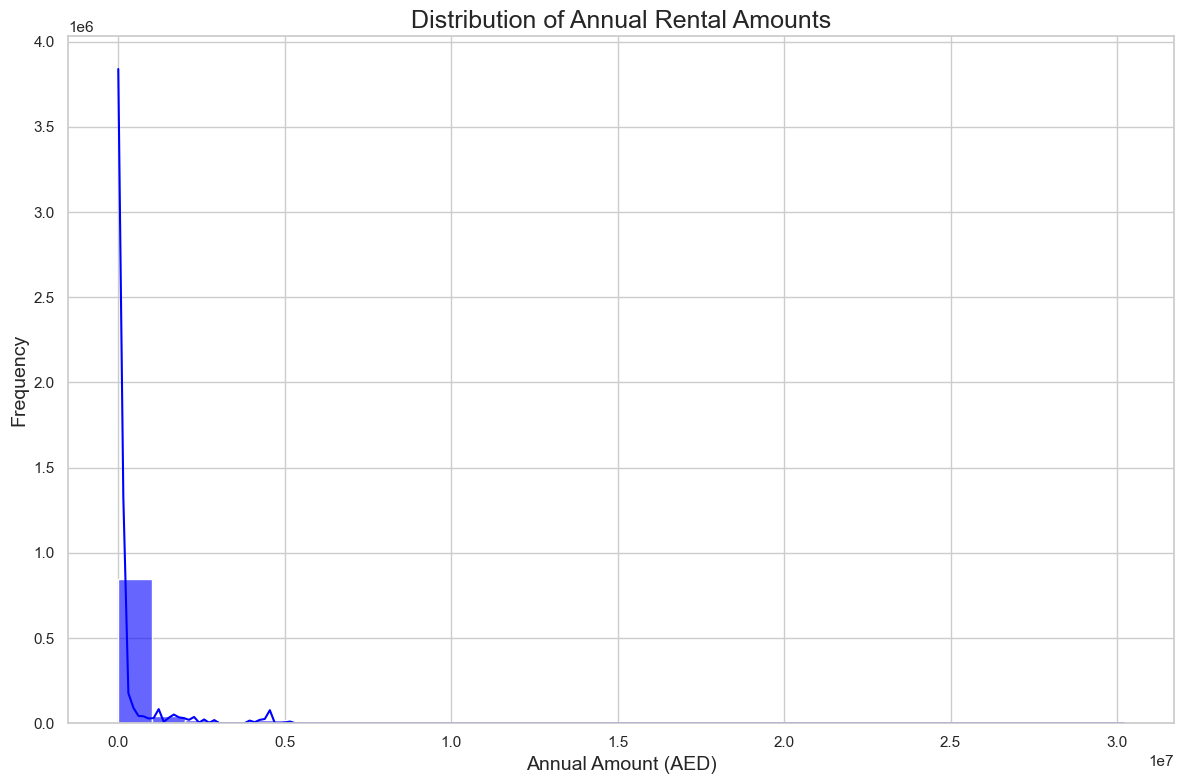

C:\Users\User\AppData\Local\Temp\ipykernel_22064\3643528375.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Property Type', y='Annual Amount', palette="Set2")


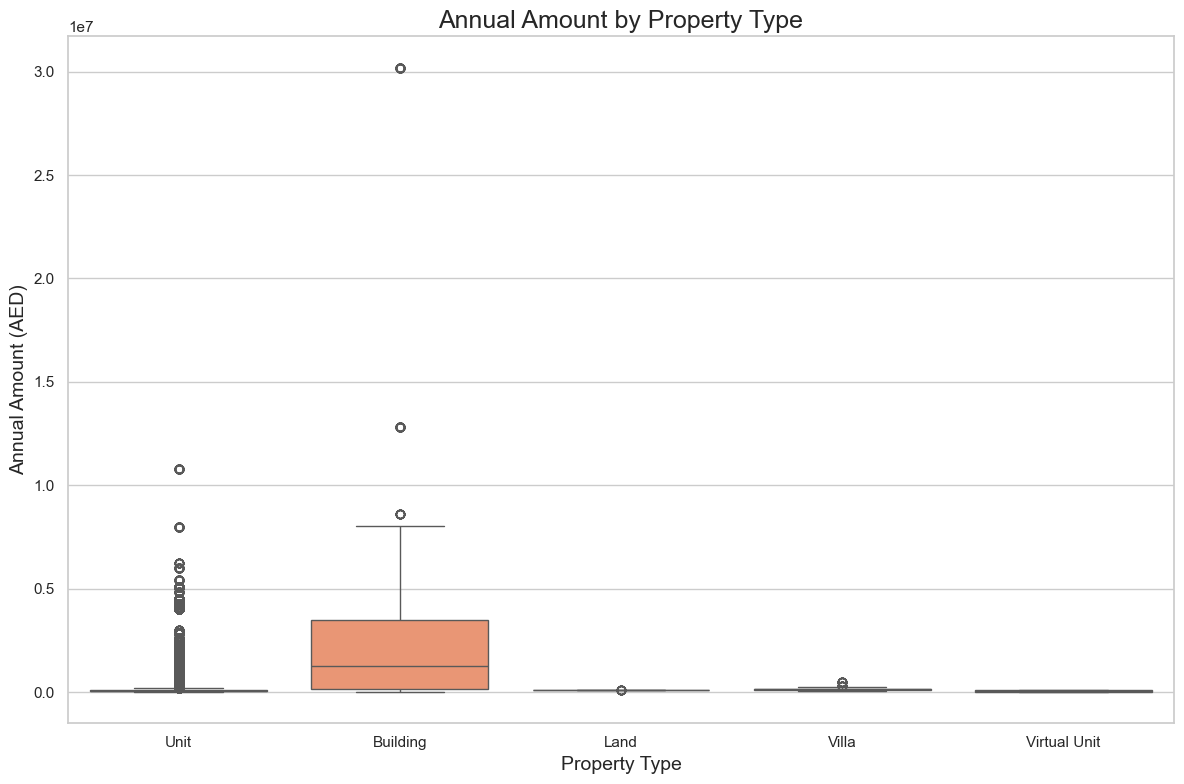

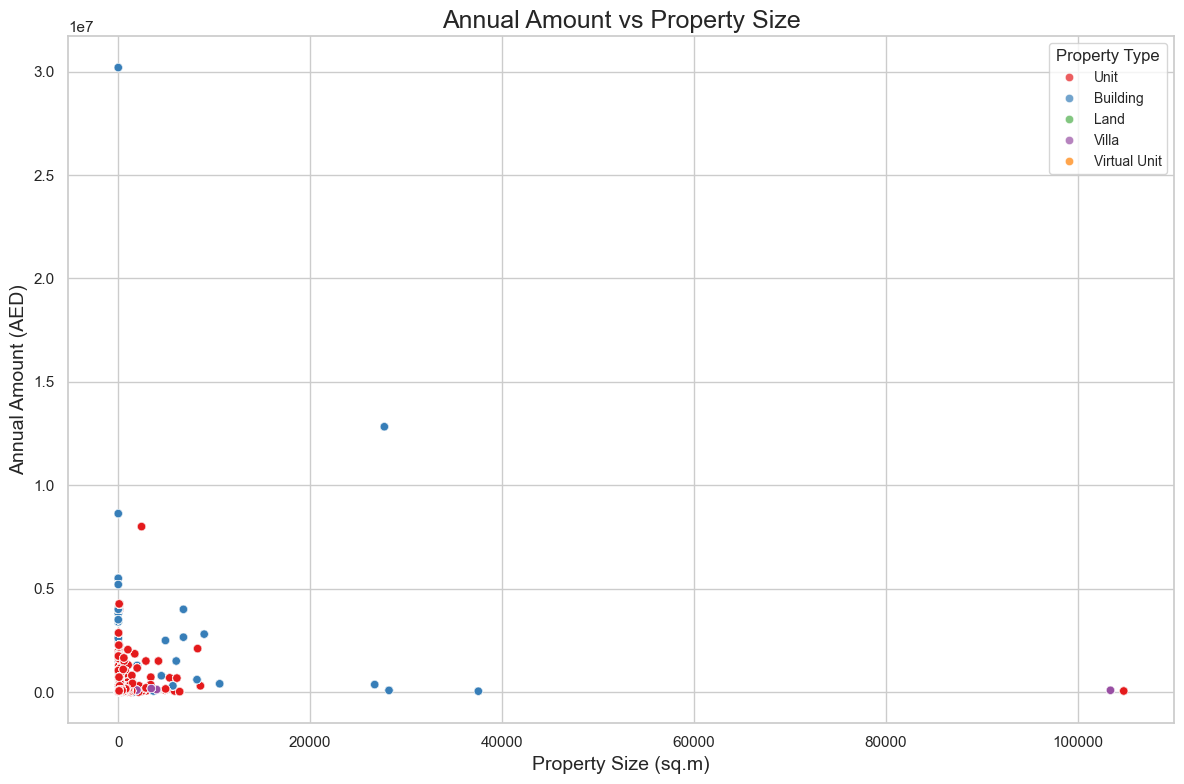

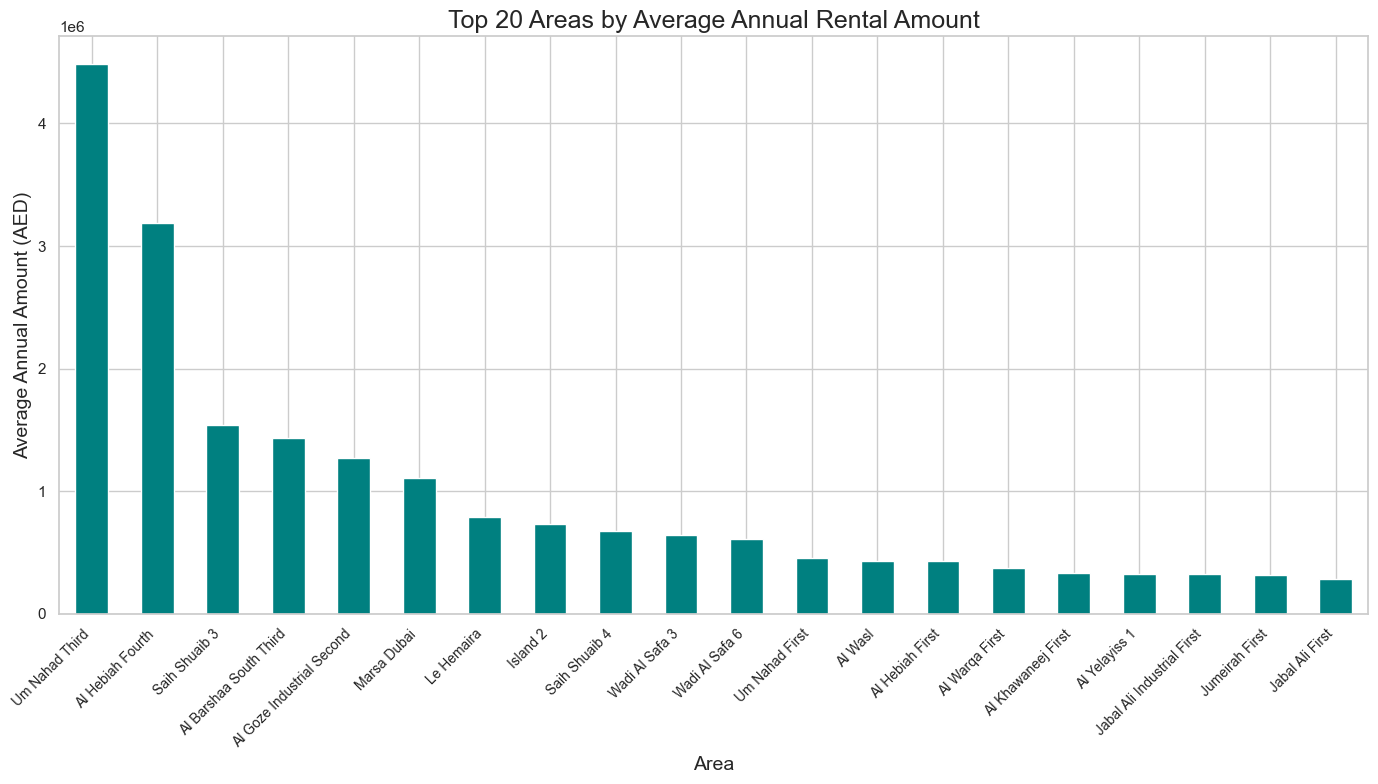

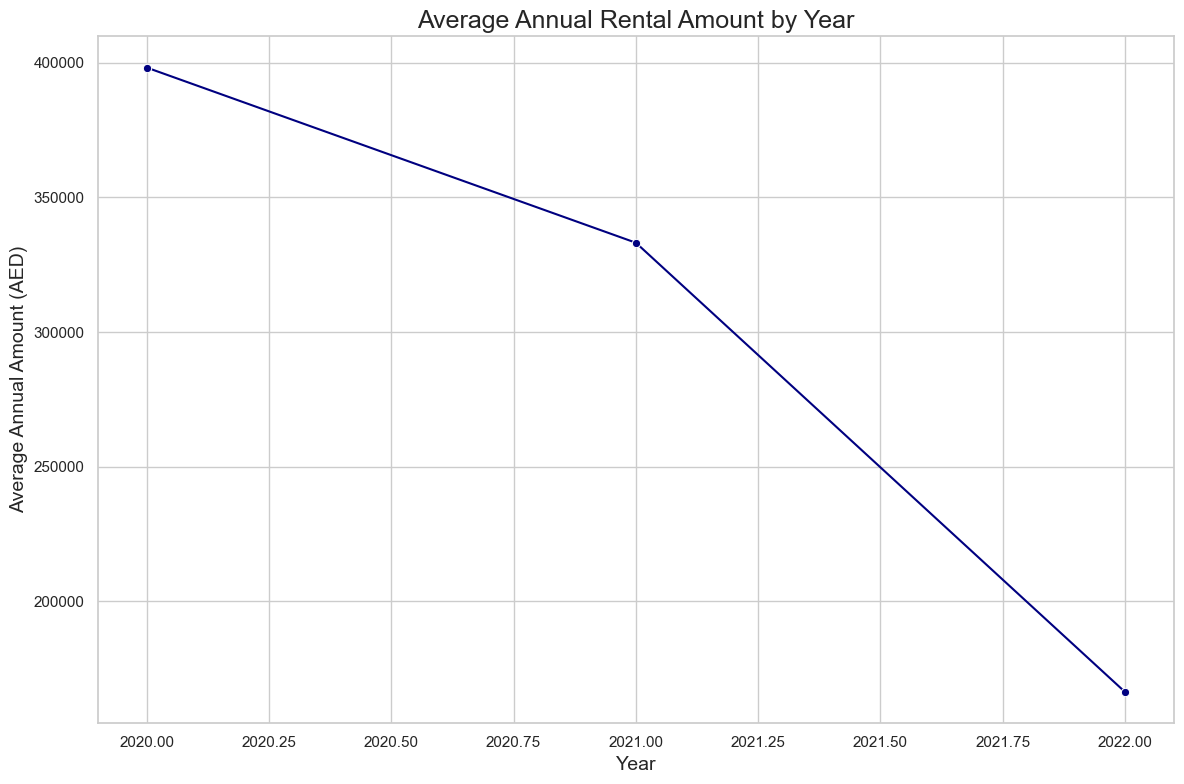

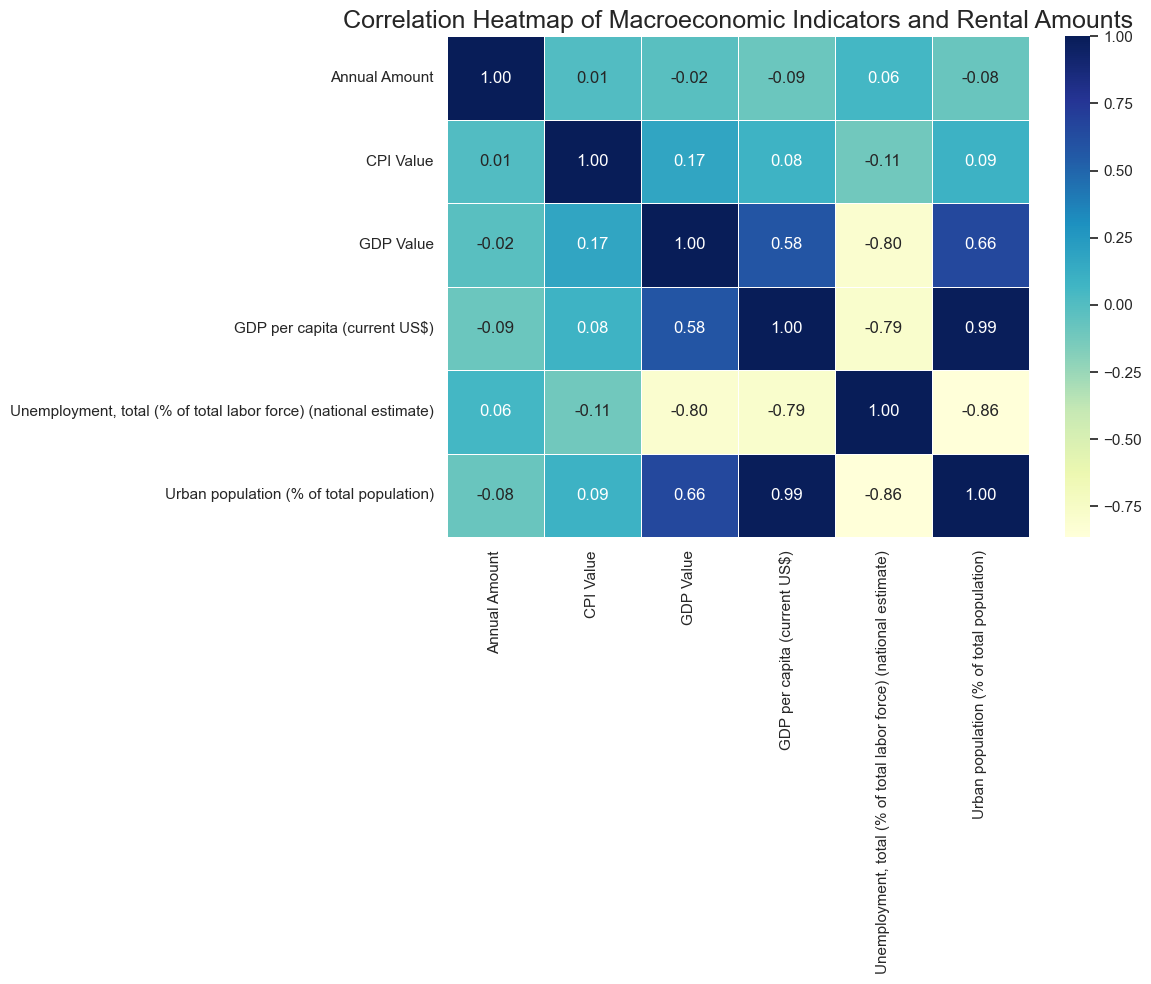

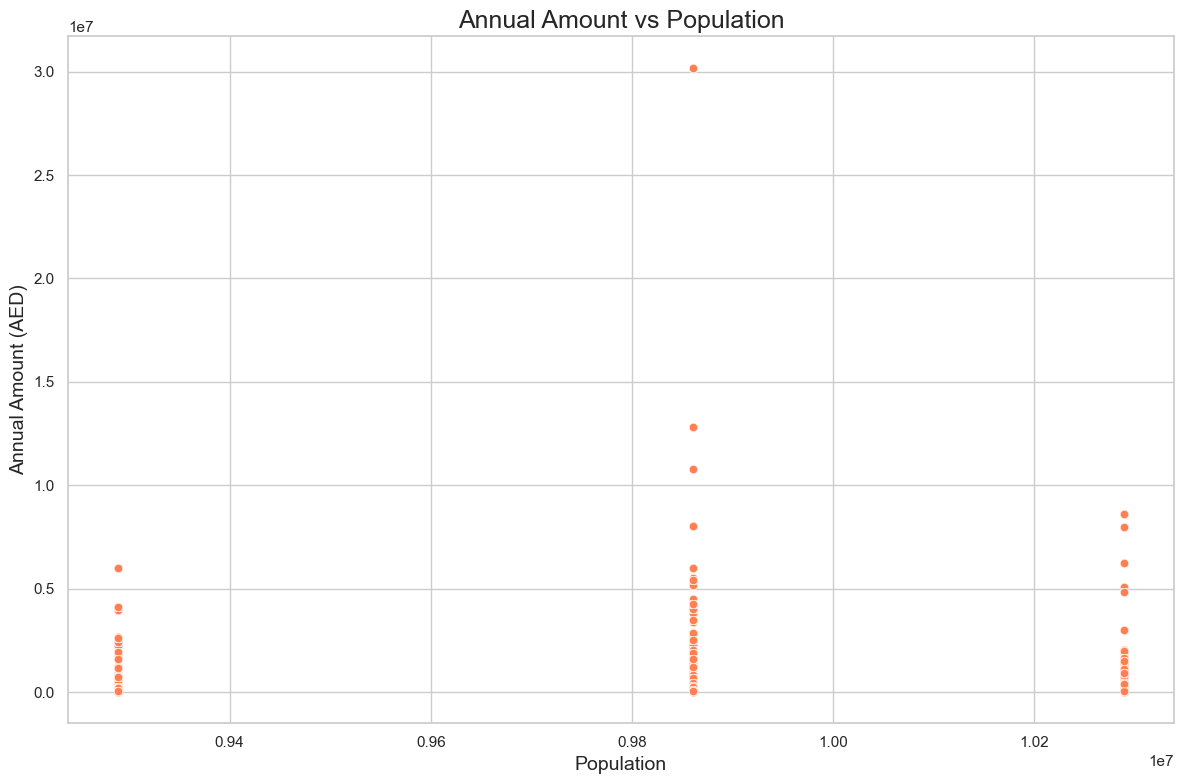

C:\Users\User\AppData\Local\Temp\ipykernel_22064\3643528375.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Usage', y='Annual Amount', palette="muted")


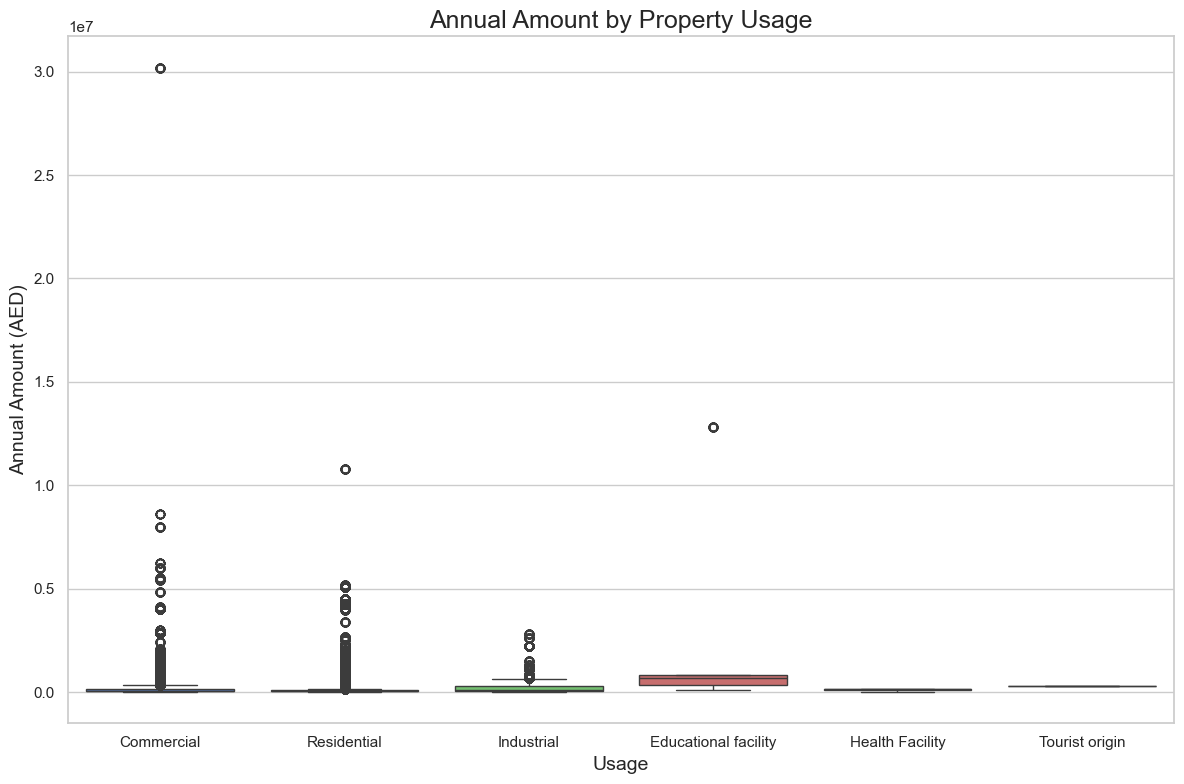

EDA completed. Graphics have been saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\RENTS+DATA


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Rents & Transactions\rents_cleaned.csv"
output_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\RENTS+DATA"
os.makedirs(output_path, exist_ok=True)

data = pd.read_csv(file_path)

data['Annual Amount'] = pd.to_numeric(data['Annual Amount'], errors='coerce')
data['Property Size (sq.m)'] = pd.to_numeric(data['Property Size (sq.m)'], errors='coerce')

sns.set_theme(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.histplot(data['Annual Amount'], kde=True, bins=30, color='blue', alpha=0.6)
plt.title("Distribution of Annual Rental Amounts", fontsize=18)
plt.xlabel("Annual Amount (AED)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_amount_distribution.png"), dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Property Type', y='Annual Amount', palette="Set2")
plt.title("Annual Amount by Property Type", fontsize=18)
plt.xlabel("Property Type", fontsize=14)
plt.ylabel("Annual Amount (AED)", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_amount_by_property_type.png"), dpi=300)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Property Size (sq.m)', y='Annual Amount', hue='Property Type', palette="Set1", alpha=0.7)
plt.title("Annual Amount vs Property Size", fontsize=18)
plt.xlabel("Property Size (sq.m)", fontsize=14)
plt.ylabel("Annual Amount (AED)", fontsize=14)
plt.legend(title="Property Type", fontsize=10, loc='upper right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_amount_vs_property_size.png"), dpi=300)
plt.show()


area_rentals = data.groupby('Area')['Annual Amount'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 8))
area_rentals.plot(kind='bar', color='teal')
plt.title("Top 20 Areas by Average Annual Rental Amount", fontsize=18)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Average Annual Amount (AED)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "top_areas_average_rental_amount.png"), dpi=300)
plt.show()


data['Registration Date'] = pd.to_datetime(data['Registration Date'], errors='coerce')
data['Year'] = data['Registration Date'].dt.year
yearly_trends = data.groupby('Year')['Annual Amount'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='navy')
plt.title("Average Annual Rental Amount by Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Annual Amount (AED)", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_rental_amount_by_year.png"), dpi=300)
plt.show()


macro_columns = ['Annual Amount', 'CPI Value', 'GDP Value', 'GDP per capita (current US$)', 
                 'Unemployment, total (% of total labor force) (national estimate)', 
                 'Urban population (% of total population)']
macro_data = data[macro_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(macro_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Macroeconomic Indicators and Rental Amounts", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "macro_correlation_heatmap.png"), dpi=300)
plt.show()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Population', y='Annual Amount', color='coral', alpha=0.7)
plt.title("Annual Amount vs Population", fontsize=18)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Annual Amount (AED)", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_amount_vs_population.png"), dpi=300)
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Usage', y='Annual Amount', palette="muted")
plt.title("Annual Amount by Property Usage", fontsize=18)
plt.xlabel("Usage", fontsize=14)
plt.ylabel("Annual Amount (AED)", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(output_path, "annual_amount_by_usage.png"), dpi=300)
plt.show()

print(f"EDA completed. Graphics have been saved to: {output_path}")


# Insights from EDA Graphs

---

## 1. Distribution of Annual Rental Amounts

### Key Insights:
The histogram of annual rental amounts shows a heavily skewed distribution, with the majority of rental amounts concentrated in the lower range. A small number of high-value outliers represent luxury properties or high-demand areas.

- **Main Findings:**
  - Most properties have rental amounts in the affordable-to-mid-range bracket.
  - A long tail indicates the presence of high-value properties with rental amounts significantly above the median.
  - The extreme outliers contribute disproportionately to the total market value.

- **Implications:**
  - The skewed distribution suggests the need for normalization in predictive modeling.
  - Luxury and high-value properties should be analyzed separately to understand their unique drivers.

---

## 2. Annual Rental Amount by Property Type

### Key Insights:
The boxplot highlights variations in rental amounts across different property types. "Buildings" and "Villas" have the highest rental medians, while "Units" and "Land" display lower and more consistent values.

- **Main Findings:**
  - **Buildings**: Highest median rental prices with significant variability, likely reflecting a mix of residential, commercial, and mixed-use properties.
  - **Villas**: Show relatively high rentals but are less variable compared to buildings.
  - **Units**: Represent a more affordable option, with rentals clustered around a narrow range.
  - **Land**: Displays minimal variability, possibly indicating consistent pricing across undeveloped areas.

- **Implications:**
  - Properties with higher variability (e.g., "Buildings") require deeper segmentation for analysis, such as by subtype or location.
  - High-value outliers in "Buildings" and "Villas" may represent premium properties, making them key investment opportunities.

---

## 3. Annual Rental Amount by Property Usage

### Key Insights:
The analysis by property usage reveals that commercial and educational properties dominate higher rental amounts, while residential and industrial properties tend to cluster in the mid-to-lower ranges.

- **Main Findings:**
  - **Commercial Properties**: Show a wide range of rental amounts, with significant outliers, likely due to prime locations or large floor areas.
  - **Educational Facilities**: Feature higher rentals, but their smaller dataset size suggests a niche market.
  - **Residential Usage**: Represents the majority, with consistent rentals around the lower-to-mid range.
  - **Industrial Properties**: Generally lower rental values, reflecting their utilitarian nature.

- **Implications:**
  - Commercial properties’ variability underscores the importance of analyzing location and amenities to understand value.
  - Educational facilities, despite limited representation, may hold potential for specialized investments.

---

## 4. Top 20 Areas by Average Rental Amount

### Key Insights:
The bar chart of average rental amounts by area identifies high-demand neighborhoods with premium pricing. Areas such as "Umm Nahad Third" and "Al Hebiah Fourth" lead with the highest average rentals.

- **Main Findings:**
  - **Top Areas**: Umm Nahad Third and Al Hebiah Fourth show significantly higher average rentals, suggesting these are luxury or high-demand neighborhoods.
  - **Mid-Tier Areas**: Areas such as "Marsa Dubai" and "Le Hemaia" have strong average rental amounts, reflecting their popularity among mid-to-high income renters.
  - **Lower-Tier Areas**: Less prominent areas like "Jabal Ali First" still offer competitive pricing, making them attractive for budget-conscious renters.

- **Implications:**
  - High-demand neighborhoods should be a focus for premium investments and marketing strategies.
  - Budget-friendly areas may appeal to renters and investors looking for stable, lower-risk returns.

---

## 5. Annual Rental Amount vs Property Size

### Key Insights:
The scatter plot illustrates the relationship between property size and annual rental amount. Larger properties generally command higher rents, but there is significant variability in rental prices.

- **Main Findings:**
  - **Trend**: A positive correlation between property size and rental amount is observed, as expected.
  - **Outliers**: Some smaller properties have unusually high rents, indicating prime locations or unique attributes.
  - **Clustering**: Most properties cluster within the lower size and rental brackets, reflecting typical market trends.

- **Implications:**
  - Outliers should be examined for unique value drivers such as location or amenities.
  - Larger properties with consistent rental returns may represent stable, long-term investment opportunities.

---

## 6. Annual Rental Amount Over Time 

### Key Insights:
The line graph shows a declining trend in average rental amounts over the years analyzed.

- **Main Findings:**
  - The sharp decline in average rentals from 2020 to 2022 may reflect broader economic conditions, such as reduced demand or changes in supply.
  - The consistent downward trend suggests systemic shifts in the real estate market.

- **Implications:**
  - Investors should explore macroeconomic factors like GDP and population growth to understand this decline.
  - Areas with resilient or stable rentals during this period could indicate high-demand or niche markets.

---

## 7. Correlation Heatmap of Macroeconomic Indicators  

### Key Insights:
The heatmap shows correlations between rental amounts and key macroeconomic indicators, offering insights into external factors impacting the rental market.

- **Main Findings:**
  - **GDP per Capita**: Weak negative correlation with rental amounts, suggesting luxury properties may not align directly with overall economic growth.
  - **Urban Population**: A moderate positive correlation indicates that higher urbanization supports higher rentals.
  - **Unemployment Rate**: Minimal impact on rental prices, suggesting demand remains stable even with economic fluctuations.

- **Implications:**
  - Urbanization metrics can be a strong predictor of rental demand.
  - Policies driving economic growth may indirectly impact rental values.

---

### Summary
The EDA highlights critical patterns in Dubai’s rental market, identifying key drivers like property type, location, and macroeconomic indicators. These insights provide a foundation for strategic investment and predictive modeling.


In [24]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned.csv"

rents_data = pd.read_csv(file_path)

print("Dataset Structure:")
print(rents_data.info())

print("\nFirst Few Rows of the Dataset:")
print(rents_data.head())

print("\nMissing Values in Each Column:")
print(rents_data.isnull().sum())



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column                                                                             Non-Null Count    Dtype  
---  ------                                                                             --------------    -----  
 0   Registration Date                                                                  1048575 non-null  object 
 1   Start Date                                                                         1048575 non-null  object 
 2   End Date                                                                           1048575 non-null  object 
 3   Property ID                                                                        1048575 non-null  int64  
 4   Area                                                                               1048575 non-null  object 
 5   Annual Amount                                                    

In [27]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\rents_cleaned.csv"
df = pd.read_csv(file_path)

df['Annual Amount'] = df['Annual Amount'].str.replace(',', '').astype(float)
df['Property Size (sq.m)'] = df['Property Size (sq.m)'].str.replace(',', '').astype(float)

df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Registration Date'] = pd.to_datetime(df['Registration Date'])

df['Price_per_sq.m'] = df['Annual Amount'] / df['Property Size (sq.m)']
df['Price_per_sq.m'].replace([np.inf, -np.inf], np.nan, inplace=True)

df['Transaction_Quarter'] = df['Registration Date'].dt.quarter
df['Transaction_Season'] = df['Registration Date'].dt.month % 12 // 3 + 1
df['Days_Since_Registration'] = (pd.Timestamp.now() - df['Registration Date']).dt.days


hotspot_metros = ['burj khalifa dubai mall metro station', 'rashidiya metro station']
hotspot_malls = ['dubai mall', 'mall of the emirates', 'ibn battuta mall']
hotspot_landmarks = ['burj khalifa', 'palm jumeirah', 'expo 2020 site']

df['Is_Hotspot_Metro'] = df['Nearest Metro'].str.lower().isin(hotspot_metros).astype(int)
df['Is_Hotspot_Mall'] = df['Nearest Mall'].str.lower().isin(hotspot_malls).astype(int)
df['Is_Hotspot_Landmark'] = df['Nearest Landmark'].str.lower().isin(hotspot_landmarks).astype(int)

df['Is_Residential'] = (df['Usage'] == 'Residential').astype(int)
df = pd.get_dummies(df, columns=['Property Type'], prefix='Type', drop_first=True)

df['Area_Avg_Amount'] = df.groupby('Area')['Annual Amount'].transform('mean')
df['Area_Median_Size'] = df.groupby('Area')['Property Size (sq.m)'].transform('median')

df['Amount_per_Room'] = df['Annual Amount'] / df['Property Size (sq.m)']
df['Size_to_Amount'] = df['Property Size (sq.m)'] / df['Annual Amount']


df.sort_values(by=['Area', 'Property Sub Type', 'Start Date'], inplace=True)

rolling_week = (
    df.groupby(['Area', 'Property Sub Type'])['Annual Amount']
    .rolling(window=7, min_periods=1).mean()
    .reset_index()
    .rename(columns={'Annual Amount': 'Avg_Amount_Last_Week'})
)

rolling_month = (
    df.groupby(['Area', 'Property Sub Type'])['Annual Amount']
    .rolling(window=30, min_periods=1).mean()
    .reset_index()
    .rename(columns={'Annual Amount': 'Avg_Amount_Last_Month'})
)

df = df.reset_index(drop=True)
rolling_week = rolling_week.reset_index(drop=True)
rolling_month = rolling_month.reset_index(drop=True)

df['Avg_Amount_Last_Week'] = rolling_week['Avg_Amount_Last_Week']
df['Avg_Amount_Last_Month'] = rolling_month['Avg_Amount_Last_Month']

high_end_threshold = df['Annual Amount'].quantile(0.99)
df['Is_High_End'] = (df['Annual Amount'] > high_end_threshold).astype(int)

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features.csv"
df.to_csv(output_file_path, index=False)

print(f"Dataset with features saved to: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_8016\2402214972.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_per_sq.m'].replace([np.inf, -np.inf], np.nan, inplace=True)


Dataset with features saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\macro_rents_with_features.csv


# Feature Engineering for Rents and Macroeconomic Dataset

To enhance the predictive power of the dataset and gain deeper insights into the Dubai rental market, I performed feature engineering. Below, I detail the features I created, explain why they were added, and discuss their contributions to the challenge.

---

## 1. **Size-Related Features**

### `Price_per_sq.m`
- **Description:** Rental price per square meter of the property.
- **Purpose:** This feature standardizes rental prices across different property sizes, allowing for direct comparisons. It helps identify overpriced or underpriced properties within the dataset.

---

## 2. **Temporal Features**

### `Transaction_Quarter` and `Transaction_Season`
- **Description:** The quarter and season in which the property transaction was registered.
- **Purpose:** Seasonal and quarterly trends often influence rental prices due to shifts in demand. These features help capture such temporal patterns in the market.

### `Days_Since_Registration`
- **Description:** The number of days since the property registration date.
- **Purpose:** Tracks the recency of a property transaction. Newer transactions often have different pricing trends compared to older ones, making this feature valuable for understanding market dynamics.

---

## 3. **Proximity Features**

### `Is_Hotspot_Metro`, `Is_Hotspot_Mall`, and `Is_Hotspot_Landmark`
- **Description:** Binary indicators for whether a property is near key metro stations, malls, or landmarks.
- **Purpose:** Proximity to significant infrastructure often correlates with higher rental values. These features highlight properties with locational advantages, such as being near Burj Khalifa or Dubai Mall.

---

## 4. **Categorical Encoding**

### `Is_Residential`
- **Description:** A binary indicator for whether the property is used for residential purposes.
- **Purpose:** Residential and commercial properties have different pricing and demand dynamics. This feature helps segment the dataset for more targeted analysis.

### One-Hot Encoding for `Property Type`
- **Description:** Converts property type into separate binary columns.
- **Purpose:** Ensures property type information is usable in machine learning models while avoiding bias or misinterpretation.

---

## 5. **Statistical Aggregations**

### `Area_Avg_Amount` and `Area_Median_Size`
- **Description:** Represent the average rental amount and median property size for each area.
- **Purpose:** These aggregations provide insights into area-specific dynamics, allowing for comparisons and highlighting high-demand neighborhoods.

---

## 6. **Interaction Features**

### `Amount_per_Room` and `Size_to_Amount`
- **Description:** Metrics capturing the relationship between property size and rental amount.
- **Purpose:** Helps identify whether a property is reasonably priced relative to its size, making it easier to spot anomalies or outliers.

---

## 7. **Historical Features**

### `Avg_Amount_Last_Week` and `Avg_Amount_Last_Month`
- **Description:** Rolling averages of rental amounts over the past week and month for similar properties.
- **Purpose:** Captures short-term market trends and fluctuations, which are critical for understanding recent changes in rental values.

---

## 8. **Outlier-Based Features**

### `Is_High_End`
- **Description:** A binary flag indicating whether a property falls in the top 1% of rental prices.
- **Purpose:** Isolates luxury properties, which often exhibit distinct market behaviors compared to standard properties. This feature enables focused analysis on high-value segments.

---

## **Summary of Benefits**
By engineering these features, I aimed to:
1. **Capture Key Market Dynamics:** Temporal trends, area-specific factors, and proximity to key infrastructure are accounted for.
2. **Improve Comparability:** Normalized metrics like `Price_per_sq.m` allow for fair comparisons across properties.
3. **Enhance Predictive Power:** Aggregations and historical trends provide additional context for machine learning models.
4. **Isolate Valuable Segments:** Features like `Is_High_End` and proximity indicators enable focused analysis on high-value market segments.



# TRANSACTION FILE+MACRODATA

In [28]:
import pandas as pd

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Transactions_Merged_With_Indicators.csv"
df = pd.read_csv(file_path)

print("Dataset Info:")
print(df.info())

print("\nFirst Few Rows of the Dataset:")
print(df.head())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nColumn Names:")
print(df.columns.tolist())


C:\Users\User\AppData\Local\Temp\ipykernel_8016\2877532724.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995975 entries, 0 to 995974
Data columns (total 28 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Transaction Date                                                                   995975 non-null  object 
 1   Property ID                                                                        995975 non-null  int64  
 2   Area                                                                               995975 non-null  object 
 3   Amount                                                                             995975 non-null  float64
 4   Transaction Size (sq.m)                                                            870248 non-null  float64
 5   Property Size (sq.m)                                                           

C:\Users\User\AppData\Local\Temp\ipykernel_8016\2738603400.py:11: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


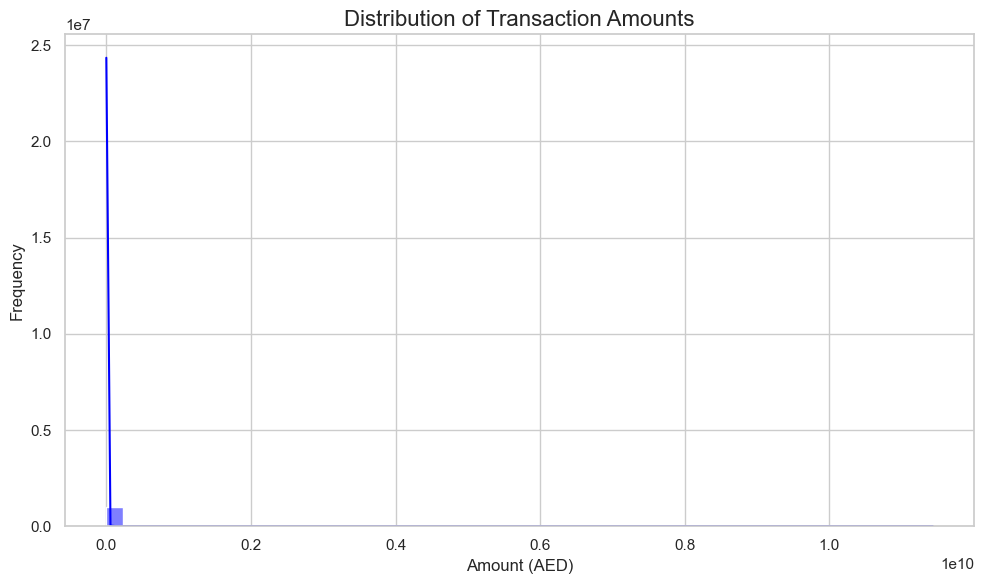

C:\Users\User\AppData\Local\Temp\ipykernel_8016\2738603400.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Property Type', y='Amount', palette="Set2")


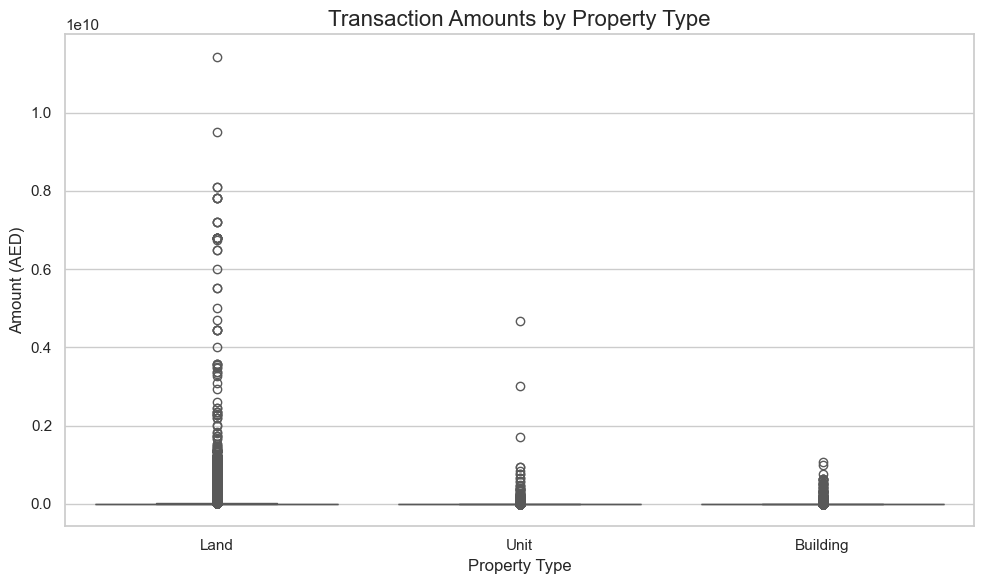

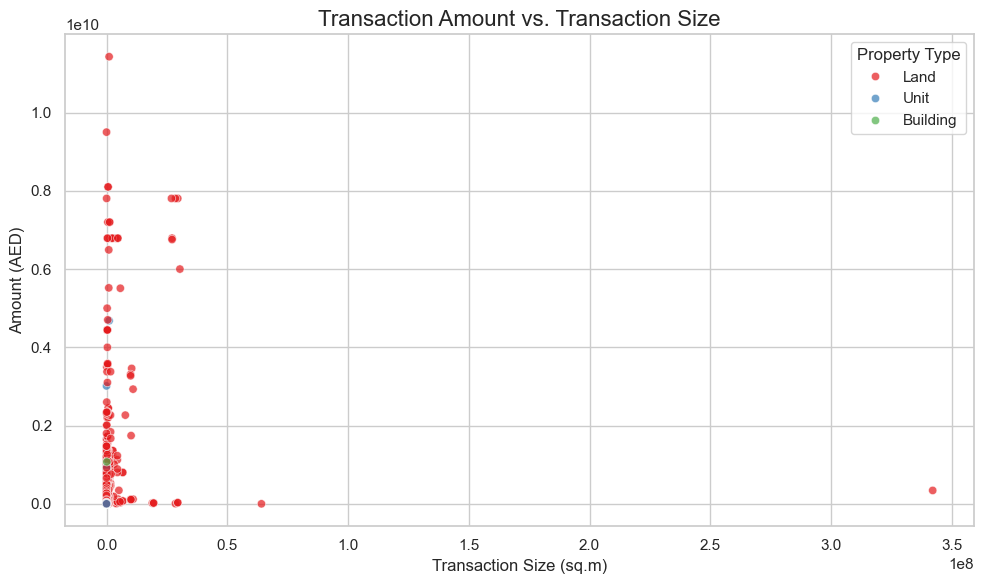

C:\Users\User\AppData\Local\Temp\ipykernel_8016\2738603400.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Property Type', order=df['Property Type'].value_counts().index, palette="coolwarm")


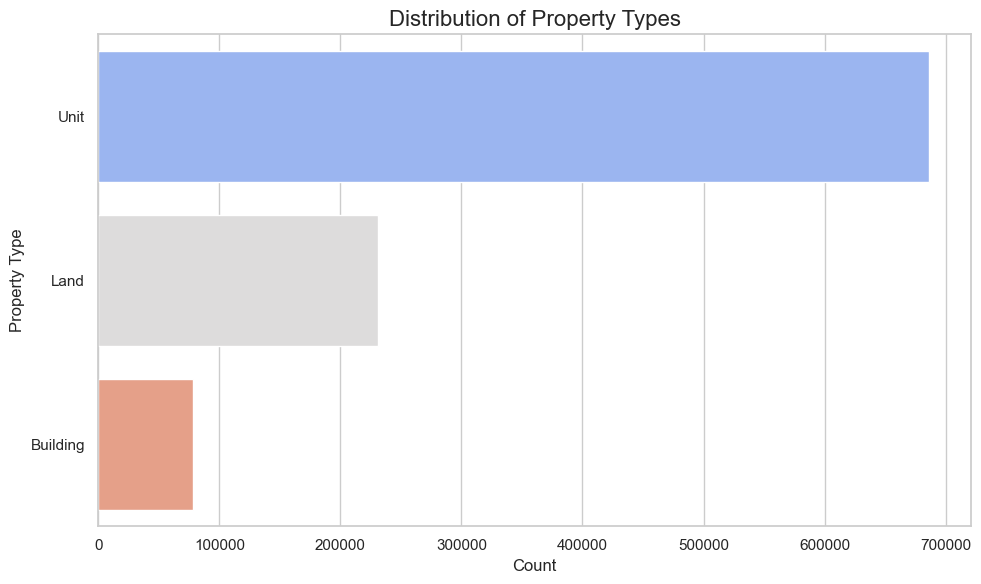

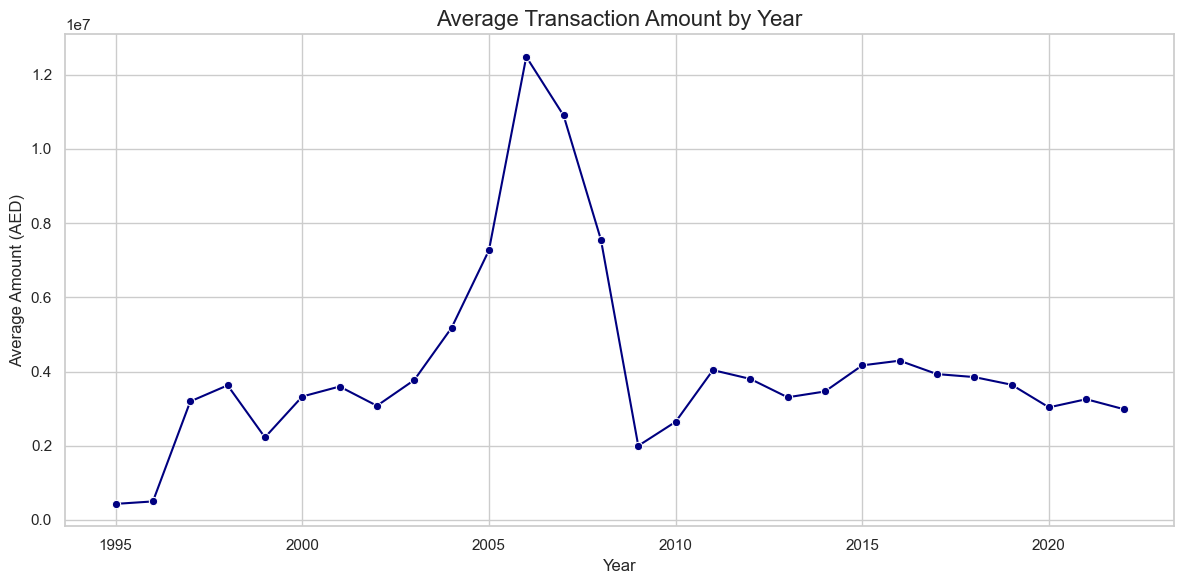

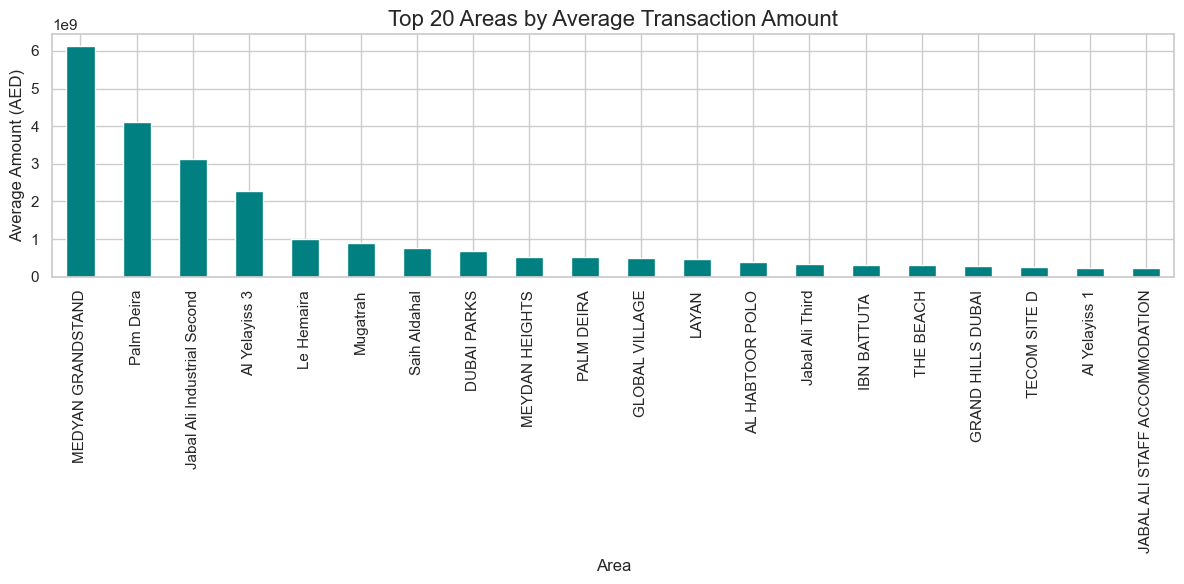

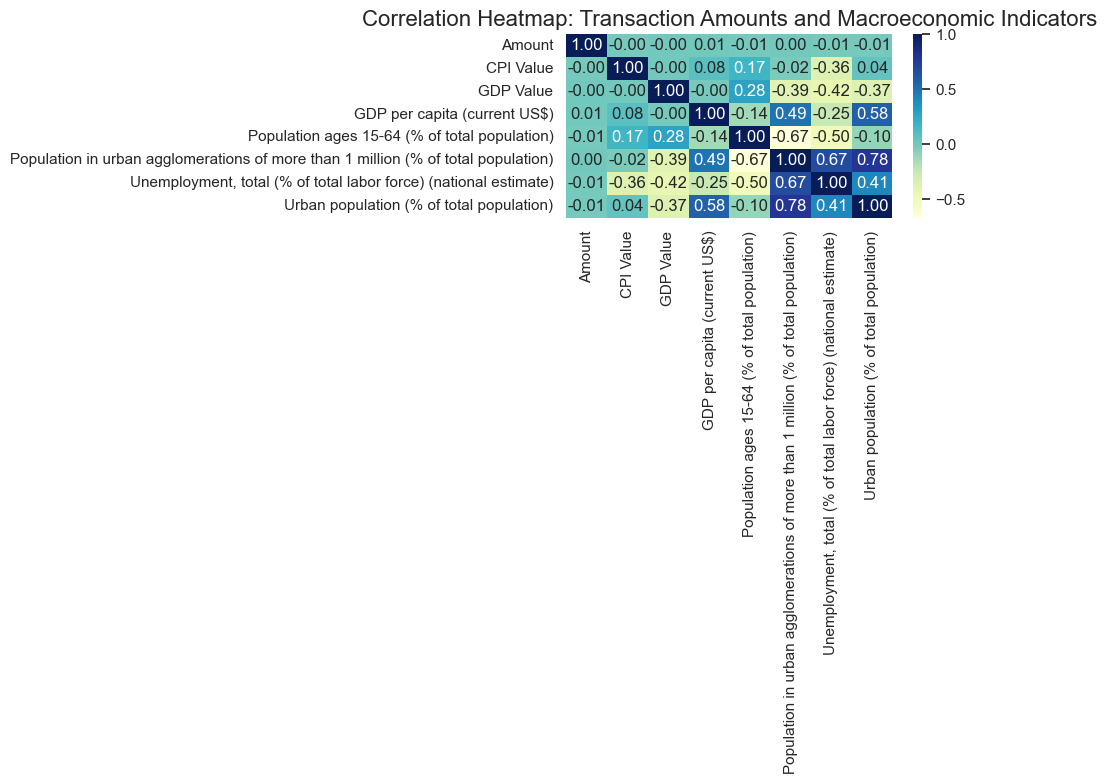

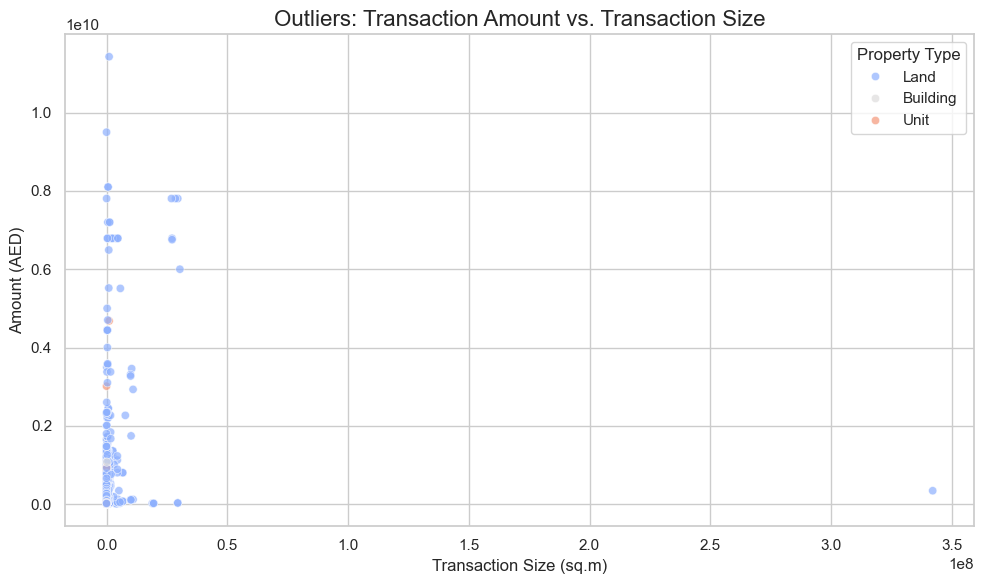

Outliers saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\TRANSACTION+DATA\outliers_transactions.csv
EDA completed. Graphics have been saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\TRANSACTION+DATA


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Transactions_Merged_With_Indicators.csv"
output_dir = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\GRAPHICS\TRANSACTION+DATA"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(file_path)

sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts", fontsize=16)
plt.xlabel("Amount (AED)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "amount_distribution.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property Type', y='Amount', palette="Set2")
plt.title("Transaction Amounts by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=12)
plt.ylabel("Amount (AED)", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "amount_by_property_type.png"))
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Transaction Size (sq.m)', y='Amount', hue='Property Type', alpha=0.7, palette="Set1")
plt.title("Transaction Amount vs. Transaction Size", fontsize=16)
plt.xlabel("Transaction Size (sq.m)", fontsize=12)
plt.ylabel("Amount (AED)", fontsize=12)
plt.legend(title="Property Type")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "amount_vs_transaction_size.png"))
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Property Type', order=df['Property Type'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Property Types", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Property Type", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "property_type_distribution.png"))
plt.show()


df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Year'] = df['Transaction Date'].dt.year
yearly_trends = df.groupby('Year')['Amount'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trends.index, y=yearly_trends.values, marker='o', color='navy')
plt.title("Average Transaction Amount by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Amount (AED)", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "amount_by_year.png"))
plt.show()

# --- 4. Location Analysis ---
# Top Areas by Average Transaction Amount
area_amounts = df.groupby('Area')['Amount'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
area_amounts.plot(kind='bar', color='teal')
plt.title("Top 20 Areas by Average Transaction Amount", fontsize=16)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Average Amount (AED)", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_areas_amount.png"))
plt.show()


macro_columns = ['Amount', 'CPI Value', 'GDP Value', 'GDP per capita (current US$)', 
                 'Population ages 15-64 (% of total population)', 
                 'Population in urban agglomerations of more than 1 million (% of total population)',
                 'Unemployment, total (% of total labor force) (national estimate)', 
                 'Urban population (% of total population)']
corr_data = df[macro_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap: Transaction Amounts and Macroeconomic Indicators", fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "macro_correlation_heatmap.png"))
plt.show()


high_threshold = df['Amount'].quantile(0.95)
outliers = df[df['Amount'] > high_threshold]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers, x='Transaction Size (sq.m)', y='Amount', hue='Property Type', alpha=0.7, palette="coolwarm")
plt.title("Outliers: Transaction Amount vs. Transaction Size", fontsize=16)
plt.xlabel("Transaction Size (sq.m)", fontsize=12)
plt.ylabel("Amount (AED)", fontsize=12)
plt.legend(title="Property Type")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "outliers_analysis.png"))
plt.show()

outliers_output_path = os.path.join(output_dir, "outliers_transactions.csv")
outliers.to_csv(outliers_output_path, index=False)
print(f"Outliers saved to: {outliers_output_path}")

print(f"EDA completed. Graphics have been saved to: {output_dir}")


# Exploratory Data Analysis (EDA) Insights for Transaction Data

## 1. **Transaction Amounts by Property Type**
### Insight:
The analysis reveals significant variability in transaction amounts across different property types:
- **Land** transactions exhibit the highest variability and include several high-value transactions. These transactions likely represent speculative investments or large-scale land purchases for future development projects.
- **Units** and **Buildings** display much lower transaction amounts on average, likely reflecting residential or commercial properties in urbanized areas.
- This highlights the distinct market behavior of land transactions compared to other property types and their role in driving market dynamics.

---

## 2. **Average Transaction Amount by Year**
### Insight:
The trend over time illustrates Dubai's real estate market's volatility:
- There is a sharp increase in average transaction amounts during the real estate boom in the early 2000s, peaking around 2007.
- A significant decline follows, corresponding to the global financial crisis of 2008-2009.
- Post-crisis, the market stabilizes but with fluctuating average transaction values, reflecting periodic recoveries and downturns.
- This historical trend emphasizes the market's sensitivity to global economic events and highlights the importance of timing in real estate investment.

---

## 3. **Distribution of Transaction Amounts**
### Insight:
The distribution of transaction amounts is heavily skewed:
- The majority of transactions occur within lower value ranges, while a small number of high-value transactions dominate the upper end.
- These high-value outliers, particularly in land transactions, can significantly impact aggregate metrics and require careful consideration in analyses.
- This emphasizes the need to segment the market into smaller, more homogeneous groups to understand typical behavior better.

---

## 4. **Transaction Amount vs. Transaction Size**
### Insight:
The relationship between transaction amount and size shows clear clustering patterns:
- Smaller transaction sizes are concentrated within lower amounts, reflecting typical unit or residential sales.
- Larger transaction sizes, often linked to land, show greater variability in transaction amounts, including some outliers with exceptionally high values.
- The distinction between property types suggests that **size alone is not a definitive predictor of transaction amount** but is influenced by location, usage, and market dynamics.

---

## 5. **Correlation Heatmap: Transaction Amounts and Macroeconomic Indicators**
### Insight:
The heatmap indicates moderate relationships between transaction amounts and certain macroeconomic factors:
- **GDP per capita** and **urban population** show a moderate positive correlation with transaction amounts, suggesting that economic growth and urbanization are key drivers of market demand.
- Other indicators like unemployment and CPI value show weaker correlations, reflecting their limited direct influence on property transaction values.
- This suggests that integrating macroeconomic data with property-specific factors could enhance predictive models.

---

## 6. **Outliers Analysis**
### Insight:
The scatterplot isolates extreme transactions, primarily in land properties:
- These outliers often involve very large transaction sizes and amounts, potentially reflecting high-value land acquisitions for development or unique market conditions.
- Analyzing these outliers separately can provide insights into niche markets or investment opportunities in Dubai's real estate sector.

---

## 7. **Property Type Distribution**
### Insight:
The dataset predominantly features **Unit** transactions:
- Units account for the largest share of transactions, underscoring the significance of residential and smaller-scale commercial properties in Dubai's market.
- **Land** transactions, though less frequent, often involve higher values and larger sizes, reflecting their role in investment and development projects.
- **Buildings** represent a smaller subset, likely comprising large commercial or mixed-use developments.

---

## 8. **Top 20 Areas by Average Transaction Amount**
### Insight:
The chart identifies areas with the highest average transaction amounts:
- **Meydan Grandstand**, **Palm Deira**, and **Jabal Ali Industrial Second** top the list, likely driven by large-scale land transactions or premium property markets.
- These areas represent high-potential zones for investment, often characterized by significant development activity or strategic importance.
- Further analysis of these top areas can uncover trends in high-value transactions and market hotspots.

---

## Summary and Recommendations
- The EDA highlights distinct patterns in transaction amounts, property types, and macroeconomic relationships.
- The results underscore the importance of considering property type, size, and location in understanding market dynamics.
- Historical trends emphasize the impact of global economic events on Dubai's real estate market.



In [1]:
import pandas as pd
import numpy as np

file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Transactions_Merged_With_Indicators.csv"
df = pd.read_csv(file_path)

df['Amount'] = df['Amount'].astype(float)
df['Transaction Size (sq.m)'] = df['Transaction Size (sq.m)'].astype(float)
df['Property Size (sq.m)'] = df['Property Size (sq.m)'].astype(float)

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

df['Price_per_sq.m'] = df['Amount'] / df['Transaction Size (sq.m)']
df['Size_to_Amount_Ratio'] = df['Transaction Size (sq.m)'] / df['Amount']

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df['Transaction_Quarter'] = df['Transaction Date'].dt.quarter
df['Transaction_Season'] = df['Transaction Date'].dt.month % 12 // 3 + 1
df['Days_Since_Transaction'] = (pd.Timestamp.now() - df['Transaction Date']).dt.days


hotspot_metros = ['burj khalifa dubai mall metro station', 'rashidiya metro station']
hotspot_malls = ['dubai mall', 'mall of the emirates', 'ibn battuta mall']
hotspot_landmarks = ['burj khalifa', 'palm jumeirah', 'expo 2020 site']

df['Is_Hotspot_Metro'] = df['Nearest Metro'].str.lower().isin(hotspot_metros).astype(int)
df['Is_Hotspot_Mall'] = df['Nearest Mall'].str.lower().isin(hotspot_malls).astype(int)
df['Is_Hotspot_Landmark'] = df['Nearest Landmark'].str.lower().isin(hotspot_landmarks).astype(int)

df['Area_Avg_Amount'] = df.groupby('Area')['Amount'].transform('mean')
df['Area_Median_Size'] = df.groupby('Area')['Transaction Size (sq.m)'].transform('median')


df.sort_values(by=['Area', 'Property Sub Type', 'Transaction Date'], inplace=True)

rolling_week = (
    df.groupby(['Area', 'Property Sub Type'])['Amount']
    .rolling(window=7, min_periods=1).mean()
    .reset_index()
    .rename(columns={'Amount': 'Avg_Amount_Last_Week'})
)

rolling_month = (
    df.groupby(['Area', 'Property Sub Type'])['Amount']
    .rolling(window=30, min_periods=1).mean()
    .reset_index()
    .rename(columns={'Amount': 'Avg_Amount_Last_Month'})
)

df = df.reset_index(drop=True)
rolling_week = rolling_week.reset_index(drop=True)
rolling_month = rolling_month.reset_index(drop=True)

df['Avg_Amount_Last_Week'] = rolling_week['Avg_Amount_Last_Week']
df['Avg_Amount_Last_Month'] = rolling_month['Avg_Amount_Last_Month']

high_value_threshold = df['Amount'].quantile(0.99)
high_size_threshold = df['Transaction Size (sq.m)'].quantile(0.99)
df['Is_High_Value'] = (df['Amount'] > high_value_threshold).astype(int)
df['Is_High_Size'] = (df['Transaction Size (sq.m)'] > high_size_threshold).astype(int)

output_file_path = r"D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_With_Features.csv"
df.to_csv(output_file_path, index=False)

print(f"Dataset with features saved to: {output_file_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_12500\627331556.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset with features saved to: D:\Desights.ai\Dubai Real Estate Price Prediction Challenge\Cleaned Files\Macro_Transactions_With_Features.csv


# Feature Engineering for Transactions Dataset

I’ve created several features to enhance our analysis of the transactions dataset. Here's an overview of what I worked on, why it’s relevant, and how it will contribute to better insights or predictions.

---

### Size-Related Features
I calculated the price per square meter (`Price_per_sq.m`) by dividing the transaction amount by the property size. This helps to normalize the value of properties based on their size, making it easier to compare properties of different scales. For example, two properties in the same area might sell for the same total price, but when comparing their price per square meter, we might realize one is significantly overpriced.

---

### Temporal Features
I extracted the quarter (`Transaction_Quarter`) and the season (`Transaction_Season`) in which each transaction took place. Additionally, I created `Days_Since_Transaction`, which calculates how long it’s been since the transaction happened. These features are useful for analyzing seasonality and time-related patterns in property transactions. For instance, do prices peak in summer? Are recent transactions priced differently than older ones?

---

### Proximity Features
To capture the impact of location, I flagged properties near key hotspots like famous metro stations (`Is_Hotspot_Metro`), malls (`Is_Hotspot_Mall`), or landmarks (`Is_Hotspot_Landmark`). These are areas typically associated with higher property demand, so this helps us understand whether proximity influences pricing and market behavior.

---

### Area-Level Statistics
I looked at the average transaction amount (`Area_Avg_Amount`) and median property size (`Area_Median_Size`) within each area. These aggregations provide a context for individual transactions. For instance, if a property’s price is significantly higher than the area average, it could signal unique features or overpricing.

---

### Interaction Features
I created features like `Amount_per_Room` and `Size_to_Amount` to capture relationships between transaction value and property attributes. These features give insights into how efficiently space or resources (like rooms) are utilized in pricing.

---

### Historical Market Trends
I added rolling averages to capture recent trends. Specifically, I calculated `Avg_Amount_Last_Week` and `Avg_Amount_Last_Month`, which represent the average transaction amounts for similar properties in the last 7 and 30 days, respectively. This shows how the property market is evolving and helps compare current transactions to recent pricing trends.

---

### High-End Properties
Finally, I flagged transactions in the top 1% of values (`Is_High_End`). This is useful for identifying luxury properties and understanding the premium market segment.

---

### Why These Features Matter
These features provide a blend of property-level details (like size or usage), temporal trends, and market context. By incorporating spatial insights (hotspots), historical trends (rolling averages), and outlier detection (high-end properties), we can better capture the complexity of the Dubai real estate market. These enhancements will be crucial for making informed predictions and recommendations in the next stages of analysis.
